<a href="https://colab.research.google.com/github/seunghwan1228/Time-Series-Example/blob/master/Timeseries_Contraset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 비교 
### Point Estimate
### Ex) 12obs에 대한 y = 2

### 1) 단변량 (Y)에 대한 예측 값

### 2) 다변량 (X1, X2, ... Xn) 에 대한 Y 예측값 

### 3) 다변량 (X1, X2, .... Xn , y) 에 대한 Y 예측값

### 4) 다변량 (X1, X2, ... Xn)에 대한 (x1, x2, ... y)에 대한 예측값

### 5) 다변량 (X1, X2, ... Xn, y)에 대한 (x1, x2, ...Xn, y)에 대한 예측값 

-----------------------------------------------------------

### 추가 - Conv1d
### 추가 - LSTM - Conv1d
### 추가 - LSTM - Conv1d - [G-MP, G-AP]

### 순차적인 값 - 
### Ex) 12obs에 대한 y = 2, 3, 4, 5, 6


데이터 

In [1]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip /content/jena_climate_2009_2016.csv.zip
!rm /content/jena_climate_2009_2016.csv.zip

--2019-11-14 06:46:31--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.38.150
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.38.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  7.12MB/s    in 1.8s    

2019-11-14 06:46:34 (7.12 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]

Archive:  /content/jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from keras import models, layers
from keras.utils import plot_model

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [0]:
df = pd.read_csv('/content/jena_climate_2009_2016.csv', index_col=0)

In [4]:
df

p (mbar)  T (degC)  ...  max. wv (m/s)  wd (deg)
Date Time                                ...                         
01.01.2009 00:10:00    996.52     -8.02  ...           1.75     152.3
01.01.2009 00:20:00    996.57     -8.41  ...           1.50     136.1
01.01.2009 00:30:00    996.53     -8.51  ...           0.63     171.6
01.01.2009 00:40:00    996.51     -8.31  ...           0.50     198.0
01.01.2009 00:50:00    996.51     -8.27  ...           0.63     214.3
...                       ...       ...  ...            ...       ...
31.12.2016 23:20:00   1000.07     -4.05  ...           1.52     240.0
31.12.2016 23:30:00    999.93     -3.35  ...           1.92     234.3
31.12.2016 23:40:00    999.82     -3.16  ...           2.00     215.2
31.12.2016 23:50:00    999.81     -4.23  ...           2.16     225.8
01.01.2017 00:00:00    999.82     -4.82  ...           1.96     184.9

[420551 rows x 14 columns]

In [10]:
df.shape

(420551, 14)

## 사용 데이터 : 1000개


train : 700개

validation : 200개

test : 100개 

In [0]:
df = df.iloc[:1000, :]

In [12]:
df.shape

(1000, 14)

In [13]:
df

p (mbar)  T (degC)  ...  max. wv (m/s)  wd (deg)
Date Time                                ...                         
01.01.2009 00:10:00    996.52     -8.02  ...           1.75     152.3
01.01.2009 00:20:00    996.57     -8.41  ...           1.50     136.1
01.01.2009 00:30:00    996.53     -8.51  ...           0.63     171.6
01.01.2009 00:40:00    996.51     -8.31  ...           0.50     198.0
01.01.2009 00:50:00    996.51     -8.27  ...           0.63     214.3
...                       ...       ...  ...            ...       ...
07.01.2009 22:00:00    997.11     -9.41  ...           1.38     188.1
07.01.2009 22:10:00    997.28     -9.30  ...           1.13      85.4
07.01.2009 22:20:00    997.48     -9.89  ...           1.00     119.3
07.01.2009 22:30:00    997.58    -10.44  ...           1.00     130.5
07.01.2009 22:40:00    997.70    -10.83  ...           1.25     132.0

[1000 rows x 14 columns]

Target 그래프

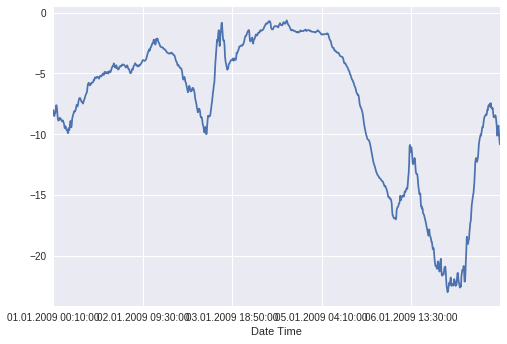

In [62]:
df['T (degC)'].plot()

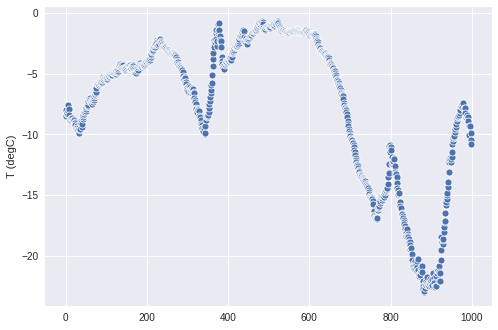

In [63]:
sns.scatterplot(np.arange(0,1000), 'T (degC)', data=df)

# Target  :  T (defC)


### 데이터는 10분 주기로 저장 되어 있음

### 학습 및 예측은 1시간 학습을 통해  01:10을 예측

ex) 

학습 데이터 00:10 ~ 01:00  
에측 결과  00:10

1시간 : 6 obs

## data scaling 

In [0]:
scaler = StandardScaler()

In [0]:
data = scaler.fit_transform(df)

In [41]:
data

array([[ 0.26768875, -0.07100373, -0.08722823, ..., -0.39539462,
        -0.48534109, -0.12379648],
       [ 0.27805649, -0.13522027, -0.15046764, ..., -0.62237621,
        -0.61367981, -0.29673968],
       [ 0.2697623 , -0.15168604, -0.16668287, ..., -1.01044152,
        -1.06029854,  0.08224079],
       ...,
       [ 0.4667493 , -0.37891379, -0.40180376, ..., -0.93722165,
        -0.87035724, -0.47608819],
       [ 0.48748477, -0.46947557, -0.49260907, ..., -0.74684999,
        -0.87035724, -0.35652252],
       [ 0.51236734, -0.53369211, -0.55747001, ..., -0.60773224,
        -0.74201853, -0.34050926]])

In [42]:
data[0]

array([ 0.26768875, -0.07100373, -0.08722823,  0.09900754,  0.82751403,
       -0.29939742, -0.1107857 , -0.6636669 , -0.11942343, -0.11534179,
        0.09565574, -0.39539462, -0.48534109, -0.12379648])

T degC : 

index = 1 [ python ] 

 index = 2 [ R ]  

In [0]:
train_data = data[:700, :]
valid_data = data[700:900, :]
test_data = data[900:, :]

In [121]:
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

(700, 14)
(200, 14)
(100, 14)


### 1) 단별량 (Y)에 대한 예측 값

In [0]:
# 단별량에 대한 예측
# y = data[1]


y_train_data = train_data[:, 1]
y_valid_data = valid_data[:, 1]
y_test_data = test_data[:, 1]

In [53]:
print(y_train_data.shape)
print(y_valid_data.shape)
print(y_test_data.shape)

(700,)
(200,)
(100,)


In [0]:
#단별량이라 shape axis 추가

y_train_data = np.expand_dims(y_train_data, 1)
y_valid_data = np.expand_dims(y_valid_data, 1)
y_test_data = np.expand_dims(y_test_data, 1)

In [88]:
print(y_train_data.shape)
print(y_valid_data.shape)
print(y_test_data.shape)

(700, 1)
(200, 1)
(100, 1)


In [0]:
train_gen = TimeseriesGenerator(y_train_data, y_train_data, length=6, batch_size=1)

valid_gen = TimeseriesGenerator(y_valid_data, y_valid_data, length=6, batch_size=1)

test_gen = TimeseriesGenerator(y_test_data, y_test_data, length=6, batch_size=1)

제네레이터 내부 확인

In [90]:
print(y_train_data[:7])

[[-0.07100373]
 [-0.13522027]
 [-0.15168604]
 [-0.11875449]
 [-0.11216818]
 [-0.07594346]
 [-0.00514062]]


In [91]:
## 6개의 데이터를 통해 7번째를 예측하는 제네레이터

counter = 0
for i in train_gen:
  print('학습')
  print(i[0])
  print('--\n')
  print('정답')
  print(i[1])
  counter +=1
  if counter == 1:
    break

학습
[[[-0.07100373]
  [-0.13522027]
  [-0.15168604]
  [-0.11875449]
  [-0.11216818]
  [-0.07594346]]]
--

정답
[[-0.00514062]]


모델 생성 

In [0]:
model = models.Sequential()
model.add(layers.LSTM(64, input_shape=(6,1)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [93]:
train_gen.end_index // train_gen.batch_size

699

In [94]:
valid_gen.end_index // valid_gen.batch_size

199

In [95]:
model_1_hist = model.fit_generator(train_gen, 
                    steps_per_epoch=train_gen.end_index // train_gen.batch_size, 
                    epochs=20, 
                    validation_data=valid_gen, 
                    validation_steps=valid_gen.end_index // valid_gen.batch_size )

Epoch 1/20





699/699 [==============================] - 19s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0712 - val_loss: 0.8498 - val_mean_absolute_error: 0.8208
Epoch 2/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0048 - mean_absolute_error: 0.0504 - val_loss: 0.6579 - val_mean_absolute_error: 0.7189
Epoch 3/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0030 - mean_absolute_error: 0.0406 - val_loss: 0.6848 - val_mean_absolute_error: 0.7424
Epoch 4/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0022 - mean_absolute_error: 0.0350 - val_loss: 0.6250 - val_mean_absolute_error: 0.7111
Epoch 5/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0020 - mean_absolute_error: 0.0322 - val_loss: 0.6590 - val_mean_absolute_error: 0.7338
Epoch 6/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0013 - mean_absolute_error: 0.0270 - val_loss: 0.5483 - val_mean_absolute_error: 0.6682

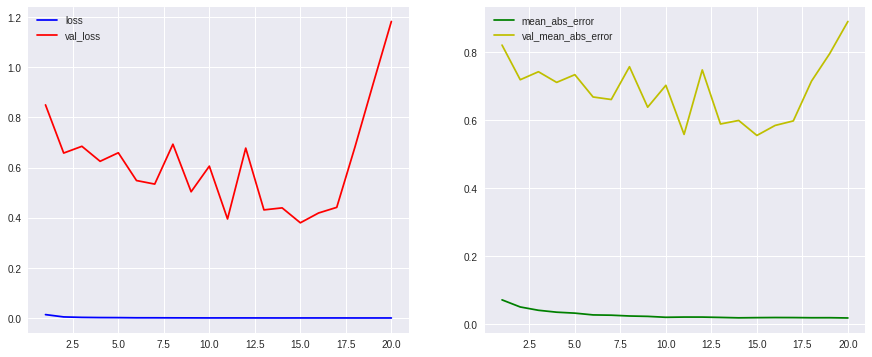

In [98]:
train_result = model_1_hist.history
epoch = np.arange(1, 20 + 1)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epoch, train_result['loss'], label='loss', c='b')
plt.plot(epoch, train_result['val_loss'], label='val_loss', c='r')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_result['mean_absolute_error'], label='mean_abs_error', c='g')
plt.plot(epoch, train_result['val_mean_absolute_error'], label='val_mean_abs_error', c='y')
plt.legend()

In [0]:
y_pred = model.predict_generator(test_gen)

In [0]:
y_pred

In [103]:
y_pred.shape

(94, 1)

In [0]:
y_predict_true = y_test_data[6:]

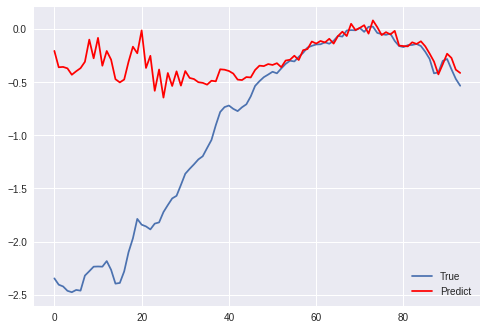

In [107]:
plt.plot(y_predict_true, label = 'True')
plt.plot(y_pred, c='r', label='Predict')
plt.legend()

# 2) 다변량 (X1, X2, ... Xn) 에 대한 Y 예측값

In [125]:
train_data[0]

array([ 0.26768875, -0.07100373, -0.08722823,  0.09900754,  0.82751403,
       -0.29939742, -0.1107857 , -0.6636669 , -0.11942343, -0.11534179,
        0.09565574, -0.39539462, -0.48534109, -0.12379648])

In [117]:
train_data[0].shape

(14,)

In [116]:
train_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]].shape

(700, 13)

In [0]:
# 단별량에 대한 예측
# y = data[1]

y_train_data = train_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_train_target = train_data[:, 1]

y_valid_data = valid_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_valid_target = valid_data[:, 1]

y_test_data = test_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_test_target = test_data[:, 1]

In [128]:
print(y_train_data.shape)
print(y_train_target.shape)

print(y_valid_data.shape)
print(y_valid_target.shape)

print(y_test_data.shape)
print(y_test_target.shape)

(700, 13)
(700,)
(200, 13)
(200,)
(100, 13)
(100,)


In [0]:
train_gen = TimeseriesGenerator(y_train_data, y_train_target, length=6, batch_size=1)

valid_gen = TimeseriesGenerator(y_valid_data, y_valid_target, length=6, batch_size=1)

test_gen = TimeseriesGenerator(y_test_data, y_test_target, length=6, batch_size=1)

In [131]:
y_train_data[:6, :]

array([[ 0.26768875, -0.08722823,  0.09900754,  0.82751403, -0.29939742,
        -0.1107857 , -0.6636669 , -0.11942343, -0.11534179,  0.09565574,
        -0.39539462, -0.48534109, -0.12379648],
       [ 0.27805649, -0.15046764,  0.03793642,  0.83942126, -0.36963234,
        -0.18005563, -0.68718451, -0.18047835, -0.18386167,  0.15806104,
        -0.62237621, -0.61367981, -0.29673968],
       [ 0.2697623 , -0.16668287,  0.03311501,  0.89895738, -0.38367933,
        -0.18775229, -0.71070212, -0.19268934, -0.19147499,  0.17145534,
        -1.01044152, -1.06029854,  0.08224079],
       [ 0.2656152 , -0.13263088,  0.07168625,  0.93467906, -0.34856187,
        -0.14157234, -0.73421972, -0.1438454 , -0.14579507,  0.13949166,
        -0.90061171, -1.12703468,  0.36407416],
       [ 0.2656152 , -0.12776631,  0.07650765,  0.92277183, -0.34153837,
        -0.13387568, -0.73421972, -0.1438454 , -0.13818175,  0.13370775,
        -0.91525569, -1.06029854,  0.53808491],
       [ 0.26354165, -0.090471

In [130]:
## 6개의 데이터를 통해 7번째를 예측하는 제네레이터

counter = 0
for i in train_gen:
  print('학습')
  print(i[0])
  print('--\n')
  print('정답')
  print(i[1])
  counter +=1
  if counter == 1:
    break

학습
[[[ 0.26768875 -0.08722823  0.09900754  0.82751403 -0.29939742
   -0.1107857  -0.6636669  -0.11942343 -0.11534179  0.09565574
   -0.39539462 -0.48534109 -0.12379648]
  [ 0.27805649 -0.15046764  0.03793642  0.83942126 -0.36963234
   -0.18005563 -0.68718451 -0.18047835 -0.18386167  0.15806104
   -0.62237621 -0.61367981 -0.29673968]
  [ 0.2697623  -0.16668287  0.03311501  0.89895738 -0.38367933
   -0.18775229 -0.71070212 -0.19268934 -0.19147499  0.17145534
   -1.01044152 -1.06029854  0.08224079]
  [ 0.2656152  -0.13263088  0.07168625  0.93467906 -0.34856187
   -0.14157234 -0.73421972 -0.1438454  -0.14579507  0.13949166
   -0.90061171 -1.12703468  0.36407416]
  [ 0.2656152  -0.12776631  0.07650765  0.92277183 -0.34153837
   -0.13387568 -0.73421972 -0.1438454  -0.13818175  0.13370775
   -0.91525569 -1.06029854  0.53808491]
  [ 0.26354165 -0.09047128  0.11829316  0.95849351 -0.29939742
   -0.08769573 -0.73421972 -0.09500146 -0.09250183  0.09900432
   -0.99579754 -1.06029854  0.30749397]]]

In [0]:
# 제네레이터와 데이터와 같은지 확인
# 아무표시도 없으면 같음

assert i[0].all() == y_train_data[:6, :].all()

In [0]:
model = models.Sequential()
model.add(layers.LSTM(64, input_shape=(6,13)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [137]:
train_gen.end_index // train_gen.batch_size

699

In [138]:
valid_gen.end_index // valid_gen.batch_size

199

In [139]:
model_2_hist = model.fit_generator(train_gen, 
                    steps_per_epoch=train_gen.end_index // train_gen.batch_size, 
                    epochs=20, 
                    validation_data=valid_gen, 
                    validation_steps=valid_gen.end_index // valid_gen.batch_size )

Epoch 1/20
699/699 [==============================] - 14s 21ms/step - loss: 0.0312 - mean_absolute_error: 0.0805 - val_loss: 0.9829 - val_mean_absolute_error: 0.8434
Epoch 2/20
699/699 [==============================] - 13s 18ms/step - loss: 0.0039 - mean_absolute_error: 0.0436 - val_loss: 1.1563 - val_mean_absolute_error: 0.9372
Epoch 3/20
699/699 [==============================] - 13s 18ms/step - loss: 0.0025 - mean_absolute_error: 0.0361 - val_loss: 0.8477 - val_mean_absolute_error: 0.7896
Epoch 4/20
699/699 [==============================] - 13s 18ms/step - loss: 0.0027 - mean_absolute_error: 0.0386 - val_loss: 0.6928 - val_mean_absolute_error: 0.6980
Epoch 5/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0019 - mean_absolute_error: 0.0320 - val_loss: 0.9318 - val_mean_absolute_error: 0.8328
Epoch 6/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0016 - mean_absolute_error: 0.0292 - val_loss: 0.7542 - val_mean_absolute_error: 0.7407
Epoc

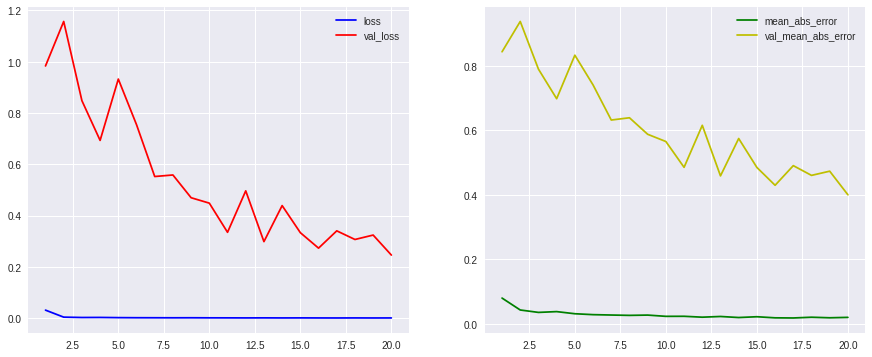

In [165]:
train_result = model_2_hist.history
epoch = np.arange(1, 20 + 1)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epoch, train_result['loss'], label='loss', c='b')
plt.plot(epoch, train_result['val_loss'], label='val_loss', c='r')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_result['mean_absolute_error'], label='mean_abs_error', c='g')
plt.plot(epoch, train_result['val_mean_absolute_error'], label='val_mean_abs_error', c='y')
plt.legend()

In [0]:
y_pred = model.predict_generator(test_gen)

In [143]:
y_pred.shape

(94, 1)

In [0]:
y_predict_true = y_test_target[6:]

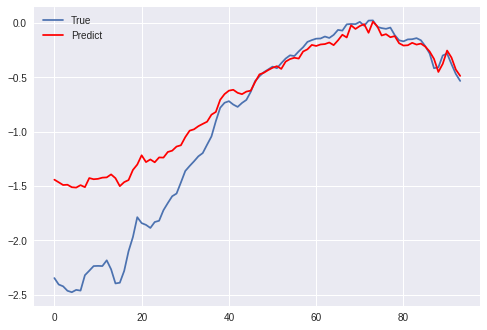

In [151]:
plt.plot(y_predict_true, label = 'True')
plt.plot(y_pred, c='r', label='Predict')
plt.legend()

# 3) 다변량 (X1, X2, .... Xn , y) 에 대한 Y 예측값

In [0]:
# 단별량에 대한 예측
# y = data[1]

y_train_data = train_data[:, :]
y_train_target = train_data[:, 1]

y_valid_data = valid_data[:, :]
y_valid_target = valid_data[:, 1]

y_test_data = test_data[:, :]
y_test_target = test_data[:, 1]

In [153]:
print(y_train_data.shape)
print(y_train_target.shape)

print(y_valid_data.shape)
print(y_valid_target.shape)

print(y_test_data.shape)
print(y_test_target.shape)

(700, 14)
(700,)
(200, 14)
(200,)
(100, 14)
(100,)


In [0]:
train_gen = TimeseriesGenerator(y_train_data, y_train_target, length=6, batch_size=1)

valid_gen = TimeseriesGenerator(y_valid_data, y_valid_target, length=6, batch_size=1)

test_gen = TimeseriesGenerator(y_test_data, y_test_target, length=6, batch_size=1)

In [155]:
y_train_data[:6, :]

array([[ 0.26768875, -0.07100373, -0.08722823,  0.09900754,  0.82751403,
        -0.29939742, -0.1107857 , -0.6636669 , -0.11942343, -0.11534179,
         0.09565574, -0.39539462, -0.48534109, -0.12379648],
       [ 0.27805649, -0.13522027, -0.15046764,  0.03793642,  0.83942126,
        -0.36963234, -0.18005563, -0.68718451, -0.18047835, -0.18386167,
         0.15806104, -0.62237621, -0.61367981, -0.29673968],
       [ 0.2697623 , -0.15168604, -0.16668287,  0.03311501,  0.89895738,
        -0.38367933, -0.18775229, -0.71070212, -0.19268934, -0.19147499,
         0.17145534, -1.01044152, -1.06029854,  0.08224079],
       [ 0.2656152 , -0.11875449, -0.13263088,  0.07168625,  0.93467906,
        -0.34856187, -0.14157234, -0.73421972, -0.1438454 , -0.14579507,
         0.13949166, -0.90061171, -1.12703468,  0.36407416],
       [ 0.2656152 , -0.11216818, -0.12776631,  0.07650765,  0.92277183,
        -0.34153837, -0.13387568, -0.73421972, -0.1438454 , -0.13818175,
         0.13370775, -0.91

In [156]:
## 6개의 데이터를 통해 7번째를 예측하는 제네레이터

counter = 0
for i in train_gen:
  print('학습')
  print(i[0])
  print('--\n')
  print('정답')
  print(i[1])
  counter +=1
  if counter == 1:
    break

학습
[[[ 0.26768875 -0.07100373 -0.08722823  0.09900754  0.82751403
   -0.29939742 -0.1107857  -0.6636669  -0.11942343 -0.11534179
    0.09565574 -0.39539462 -0.48534109 -0.12379648]
  [ 0.27805649 -0.13522027 -0.15046764  0.03793642  0.83942126
   -0.36963234 -0.18005563 -0.68718451 -0.18047835 -0.18386167
    0.15806104 -0.62237621 -0.61367981 -0.29673968]
  [ 0.2697623  -0.15168604 -0.16668287  0.03311501  0.89895738
   -0.38367933 -0.18775229 -0.71070212 -0.19268934 -0.19147499
    0.17145534 -1.01044152 -1.06029854  0.08224079]
  [ 0.2656152  -0.11875449 -0.13263088  0.07168625  0.93467906
   -0.34856187 -0.14157234 -0.73421972 -0.1438454  -0.14579507
    0.13949166 -0.90061171 -1.12703468  0.36407416]
  [ 0.2656152  -0.11216818 -0.12776631  0.07650765  0.92277183
   -0.34153837 -0.13387568 -0.73421972 -0.1438454  -0.13818175
    0.13370775 -0.91525569 -1.06029854  0.53808491]
  [ 0.26354165 -0.07594346 -0.09047128  0.11829316  0.95849351
   -0.29939742 -0.08769573 -0.73421972 -0.09

In [0]:
# 제네레이터와 데이터와 같은지 확인
# 아무표시도 없으면 같음

assert i[0].all() == y_train_data[:6, :].all()

In [0]:
model = models.Sequential()
model.add(layers.LSTM(64, input_shape=(6,14)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [159]:
train_gen.end_index // train_gen.batch_size

699

In [160]:
valid_gen.end_index // valid_gen.batch_size

199

In [162]:
model_3_hist = model.fit_generator(train_gen, 
                    steps_per_epoch=train_gen.end_index // train_gen.batch_size, 
                    epochs=20, 
                    validation_data=valid_gen, 
                    validation_steps=valid_gen.end_index // valid_gen.batch_size )

Epoch 1/20
699/699 [==============================] - 14s 20ms/step - loss: 0.0140 - mean_absolute_error: 0.0655 - val_loss: 0.7356 - val_mean_absolute_error: 0.7485
Epoch 2/20
699/699 [==============================] - 13s 18ms/step - loss: 0.0033 - mean_absolute_error: 0.0421 - val_loss: 0.8558 - val_mean_absolute_error: 0.8272
Epoch 3/20
699/699 [==============================] - 13s 18ms/step - loss: 0.0022 - mean_absolute_error: 0.0344 - val_loss: 0.5484 - val_mean_absolute_error: 0.6328
Epoch 4/20
699/699 [==============================] - 13s 18ms/step - loss: 0.0023 - mean_absolute_error: 0.0348 - val_loss: 0.6067 - val_mean_absolute_error: 0.6720
Epoch 5/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0019 - mean_absolute_error: 0.0325 - val_loss: 0.3392 - val_mean_absolute_error: 0.4862
Epoch 6/20
699/699 [==============================] - 13s 18ms/step - loss: 0.0016 - mean_absolute_error: 0.0283 - val_loss: 0.3721 - val_mean_absolute_error: 0.5282
Epoc

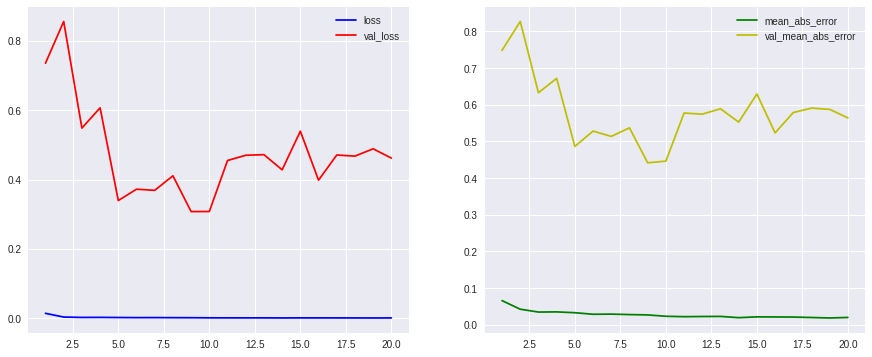

In [166]:
train_result = model_3_hist.history
epoch = np.arange(1, 20 + 1)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epoch, train_result['loss'], label='loss', c='b')
plt.plot(epoch, train_result['val_loss'], label='val_loss', c='r')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_result['mean_absolute_error'], label='mean_abs_error', c='g')
plt.plot(epoch, train_result['val_mean_absolute_error'], label='val_mean_abs_error', c='y')
plt.legend()

In [0]:
y_pred = model.predict_generator(test_gen)

In [168]:
y_pred.shape

(94, 1)

In [0]:
y_predict_true = y_test_target[6:]

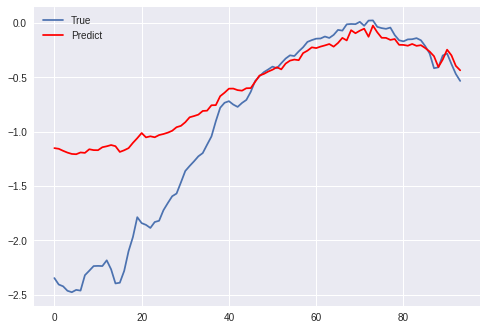

In [170]:
plt.plot(y_predict_true, label = 'True')
plt.plot(y_pred, c='r', label='Predict')
plt.legend()

# 4) 다변량 (X1, X2, ... Xn)에 대한 (x1, x2, ... y)에 대한 예측값

### 각 변수에 대한 예측값 표기

In [0]:
## 각 변수별 예측 값 확인을 위한 data frame 화

train_df = pd.DataFrame(train_data)
valid_df = pd.DataFrame(valid_data)
test_df = pd.DataFrame(test_data)

In [186]:
train_df.head()

0         1         2   ...        11        12        13
0  0.267689 -0.071004 -0.087228  ... -0.395395 -0.485341 -0.123796
1  0.278056 -0.135220 -0.150468  ... -0.622376 -0.613680 -0.296740
2  0.269762 -0.151686 -0.166683  ... -1.010442 -1.060299  0.082241
3  0.265615 -0.118754 -0.132631  ... -0.900612 -1.127035  0.364074
4  0.265615 -0.112168 -0.127766  ... -0.915256 -1.060299  0.538085

[5 rows x 14 columns]

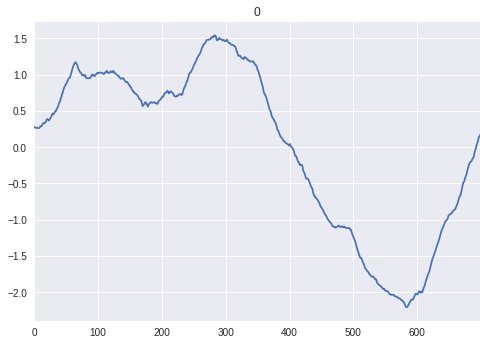

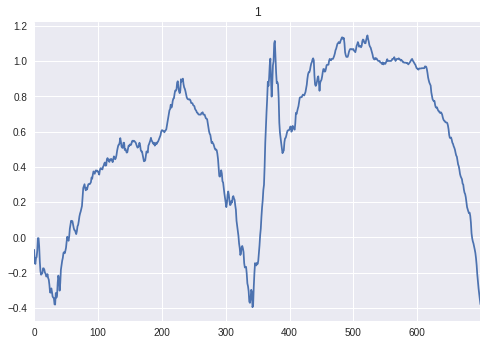

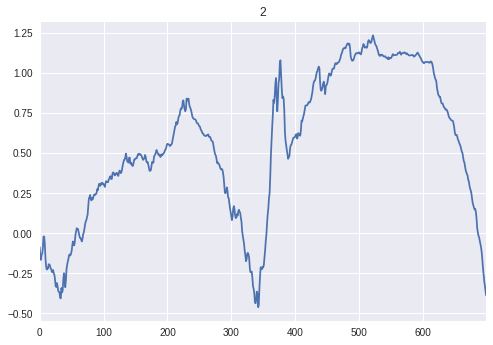

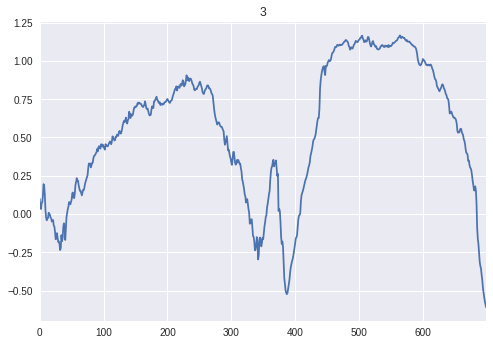

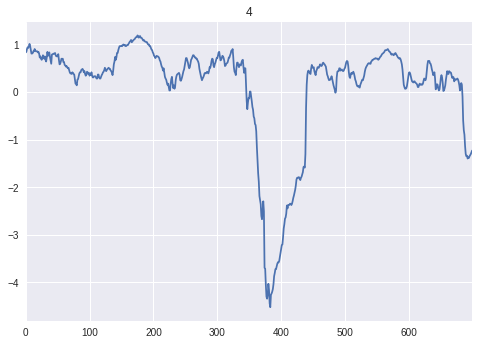

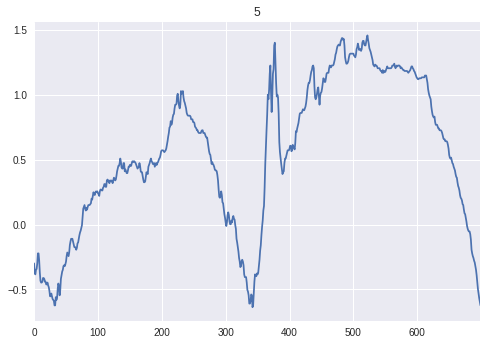

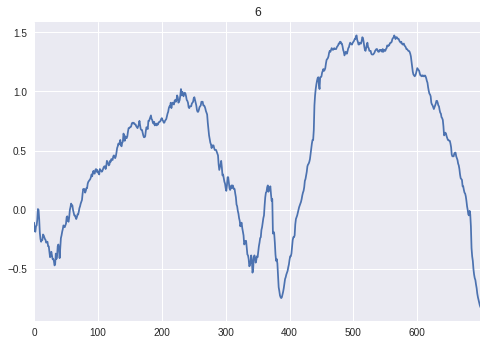

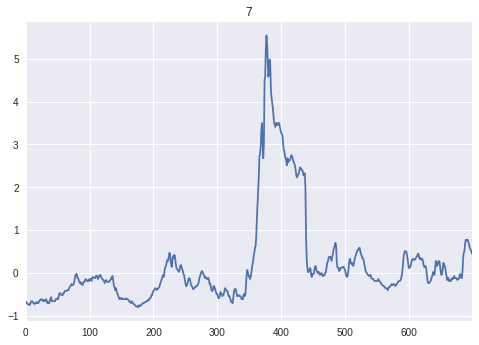

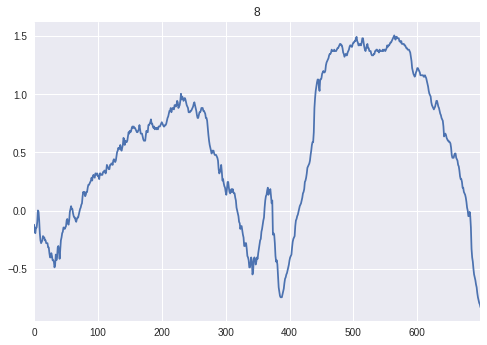

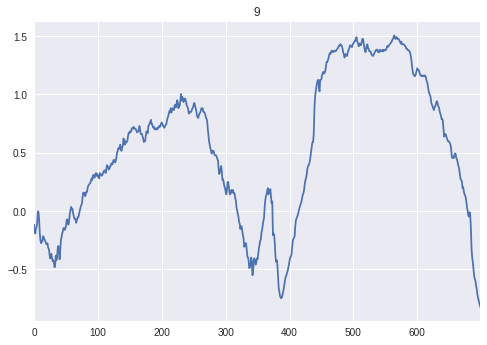

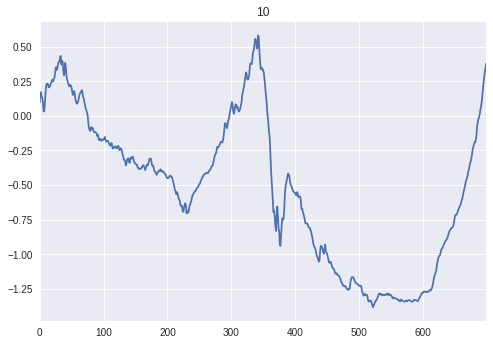

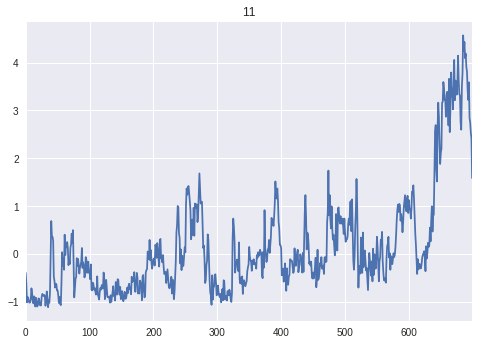

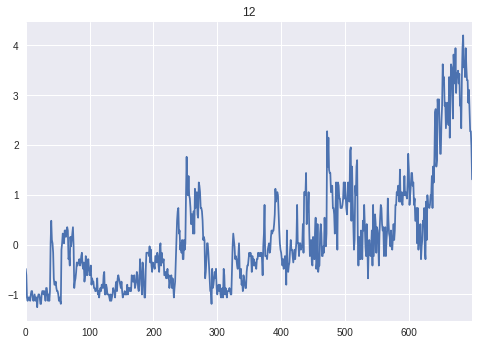

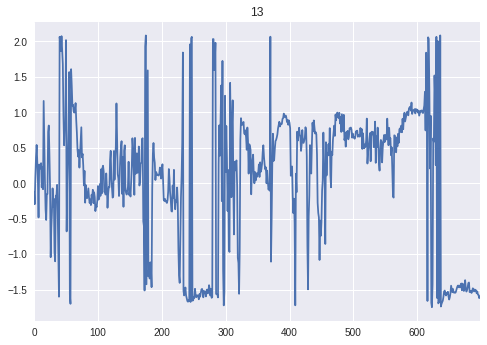

In [213]:
# 학습데이터

for i in train_df.columns:
  plt.figure()
  train_df.iloc[:, i].plot()
  plt.title(i)

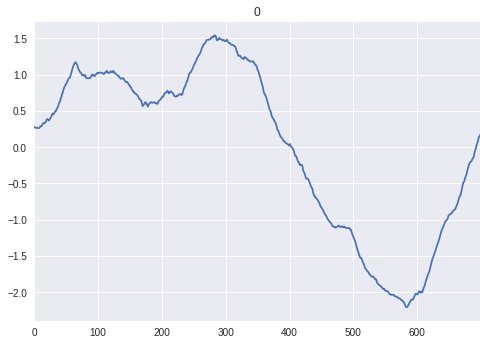

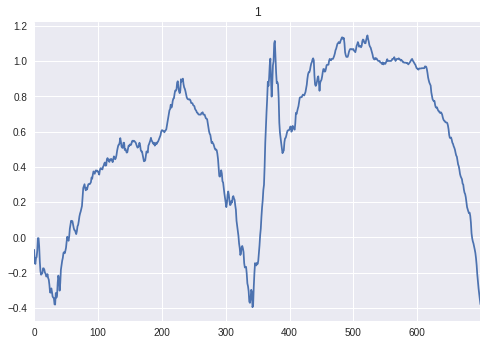

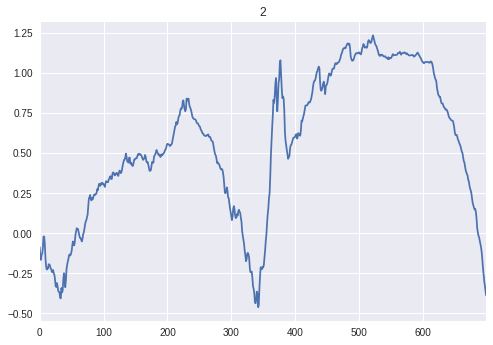

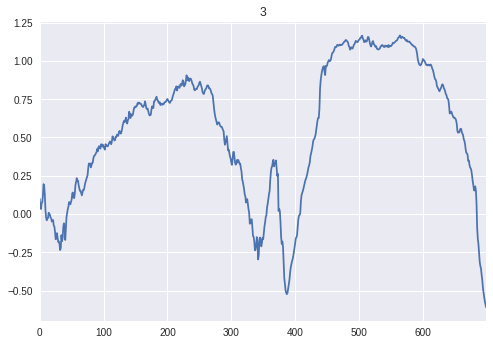

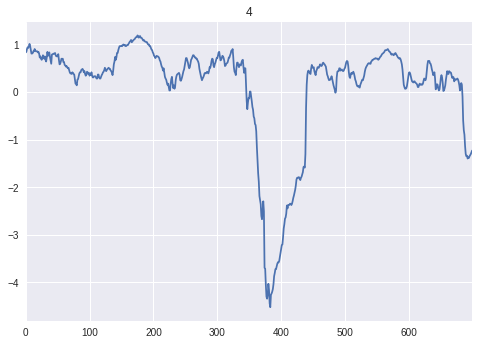

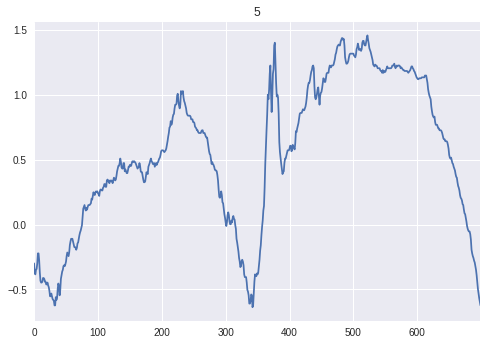

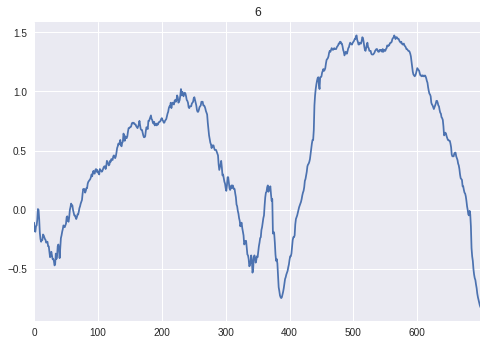

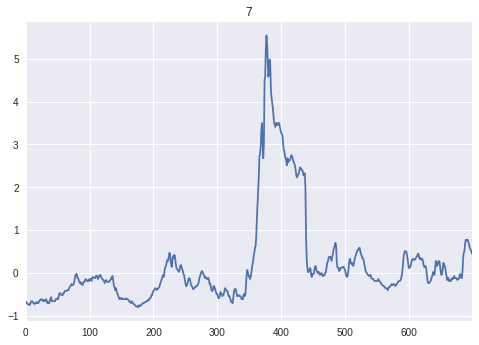

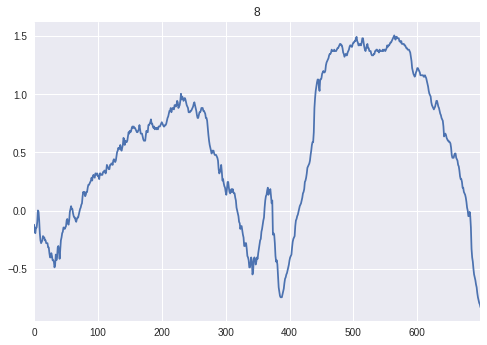

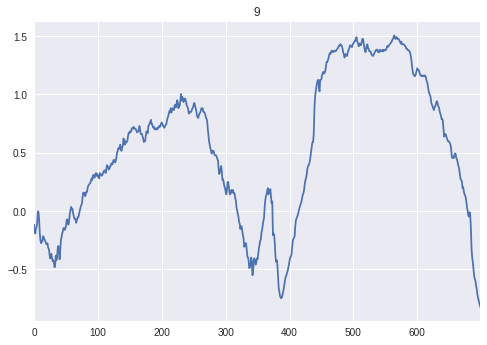

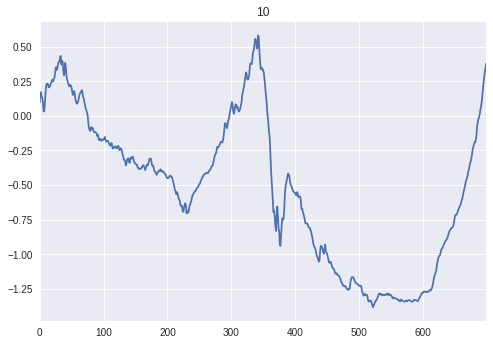

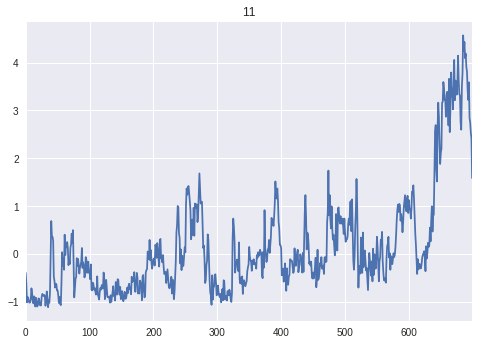

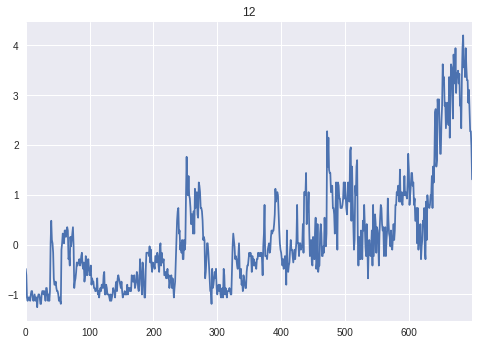

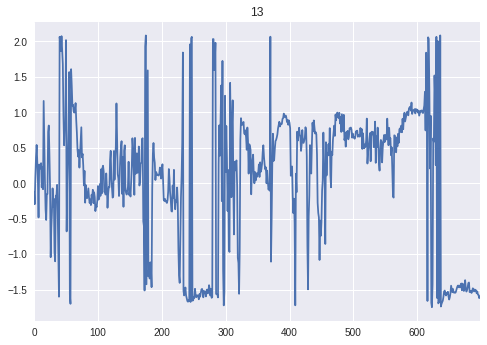

In [215]:
# 검증 데이터
for i in valid_df.columns:
  plt.figure()
  train_df.iloc[:, i].plot()
  plt.title(i)

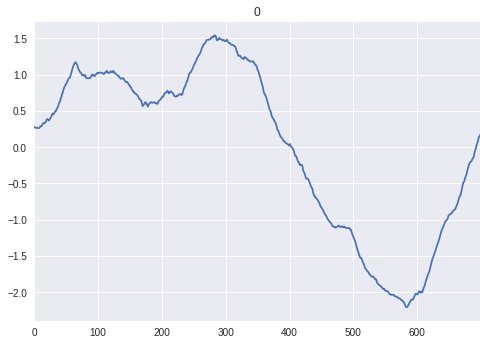

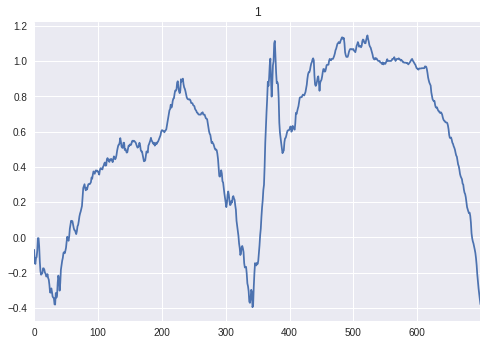

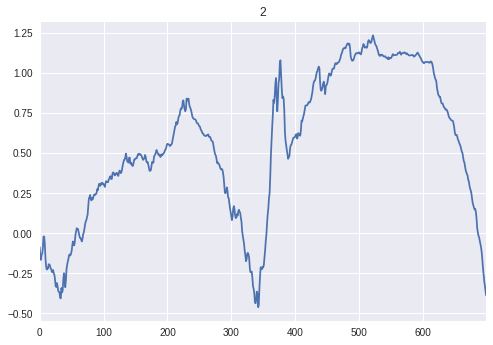

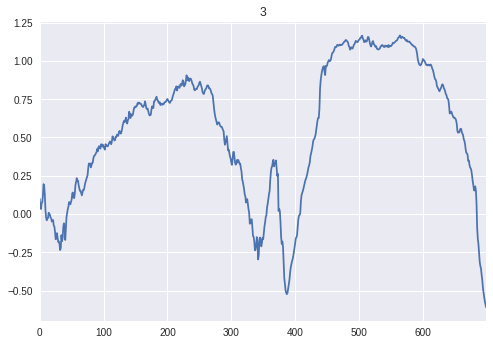

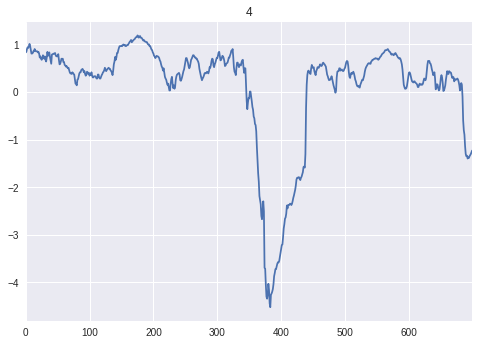

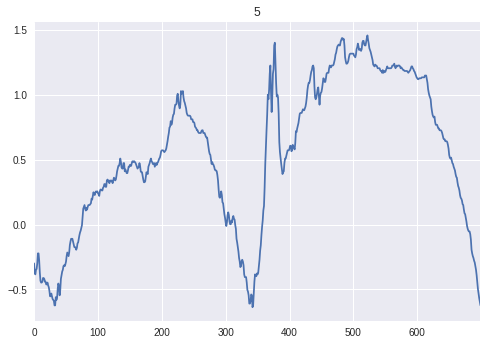

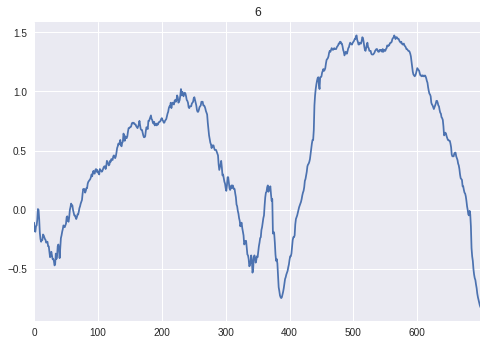

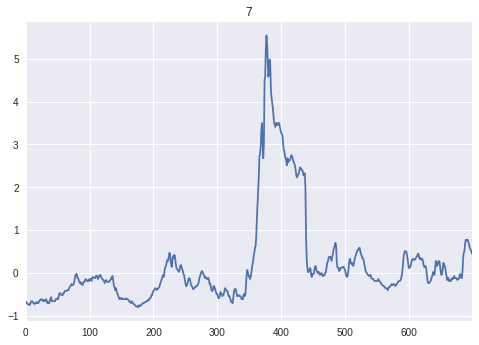

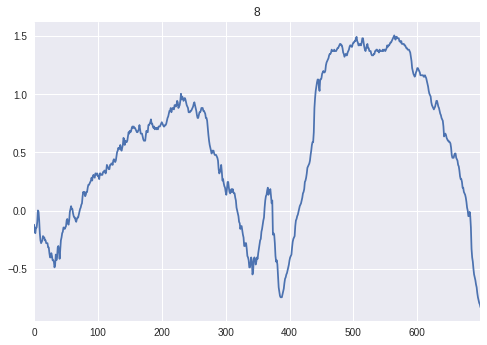

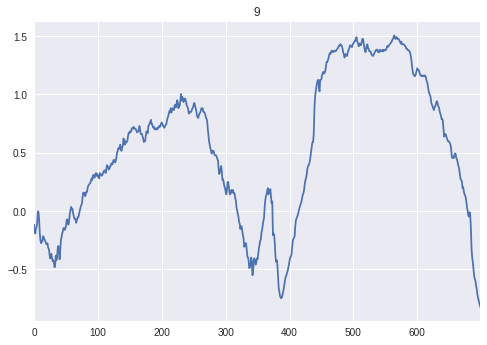

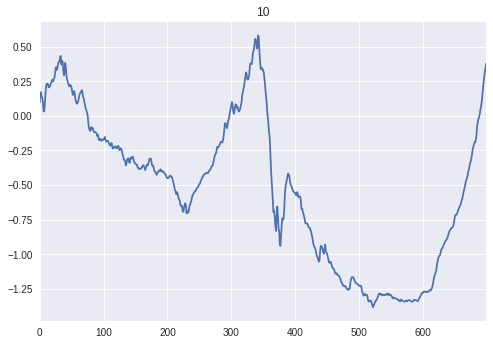

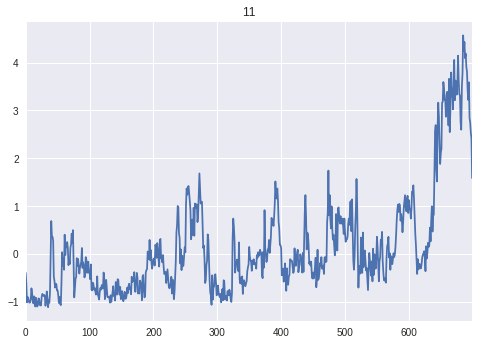

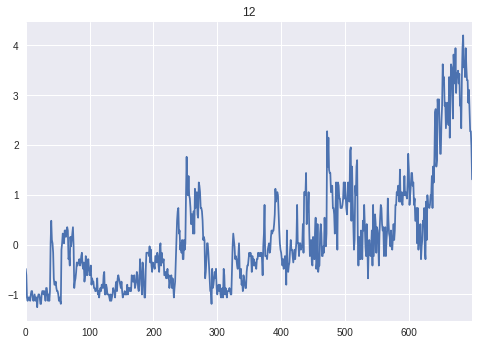

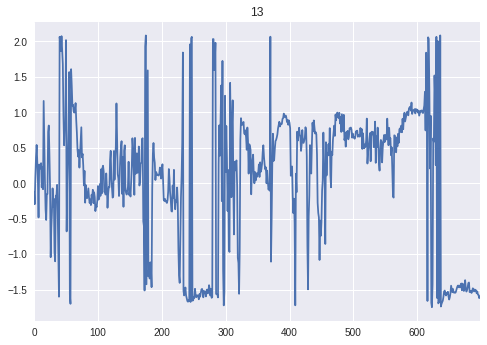

In [216]:
# 테스트 데이터
for i in test_df.columns:
  plt.figure()
  train_df.iloc[:, i].plot()
  plt.title(i)

In [217]:
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

(700, 14)
(200, 14)
(100, 14)


In [0]:
# 다별량에 대한 예측

y_train_data = train_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_train_target = train_data[:, :]

y_valid_data = valid_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_valid_target = valid_data[:, :]

y_test_data = test_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_test_target = test_data[:, :]

In [219]:
print(y_train_data.shape)
print(y_train_target.shape)

print(y_valid_data.shape)
print(y_valid_target.shape)

print(y_test_data.shape)
print(y_test_target.shape)

(700, 13)
(700, 14)
(200, 13)
(200, 14)
(100, 13)
(100, 14)


In [0]:
train_gen = TimeseriesGenerator(y_train_data, y_train_target, length=6, batch_size=1)

valid_gen = TimeseriesGenerator(y_valid_data, y_valid_target, length=6, batch_size=1)

test_gen = TimeseriesGenerator(y_test_data, y_test_target, length=6, batch_size=1)

In [221]:
y_train_data[:6, :]

array([[ 0.26768875, -0.08722823,  0.09900754,  0.82751403, -0.29939742,
        -0.1107857 , -0.6636669 , -0.11942343, -0.11534179,  0.09565574,
        -0.39539462, -0.48534109, -0.12379648],
       [ 0.27805649, -0.15046764,  0.03793642,  0.83942126, -0.36963234,
        -0.18005563, -0.68718451, -0.18047835, -0.18386167,  0.15806104,
        -0.62237621, -0.61367981, -0.29673968],
       [ 0.2697623 , -0.16668287,  0.03311501,  0.89895738, -0.38367933,
        -0.18775229, -0.71070212, -0.19268934, -0.19147499,  0.17145534,
        -1.01044152, -1.06029854,  0.08224079],
       [ 0.2656152 , -0.13263088,  0.07168625,  0.93467906, -0.34856187,
        -0.14157234, -0.73421972, -0.1438454 , -0.14579507,  0.13949166,
        -0.90061171, -1.12703468,  0.36407416],
       [ 0.2656152 , -0.12776631,  0.07650765,  0.92277183, -0.34153837,
        -0.13387568, -0.73421972, -0.1438454 , -0.13818175,  0.13370775,
        -0.91525569, -1.06029854,  0.53808491],
       [ 0.26354165, -0.090471

In [222]:
## 6개의 데이터를 통해 7번째를 예측하는 제네레이터

counter = 0
for i in train_gen:
  print('학습')
  print(i[0])
  print('--\n')
  print('정답')
  print(i[1])
  counter +=1
  if counter == 1:
    break

학습
[[[ 0.26768875 -0.08722823  0.09900754  0.82751403 -0.29939742
   -0.1107857  -0.6636669  -0.11942343 -0.11534179  0.09565574
   -0.39539462 -0.48534109 -0.12379648]
  [ 0.27805649 -0.15046764  0.03793642  0.83942126 -0.36963234
   -0.18005563 -0.68718451 -0.18047835 -0.18386167  0.15806104
   -0.62237621 -0.61367981 -0.29673968]
  [ 0.2697623  -0.16668287  0.03311501  0.89895738 -0.38367933
   -0.18775229 -0.71070212 -0.19268934 -0.19147499  0.17145534
   -1.01044152 -1.06029854  0.08224079]
  [ 0.2656152  -0.13263088  0.07168625  0.93467906 -0.34856187
   -0.14157234 -0.73421972 -0.1438454  -0.14579507  0.13949166
   -0.90061171 -1.12703468  0.36407416]
  [ 0.2656152  -0.12776631  0.07650765  0.92277183 -0.34153837
   -0.13387568 -0.73421972 -0.1438454  -0.13818175  0.13370775
   -0.91525569 -1.06029854  0.53808491]
  [ 0.26354165 -0.09047128  0.11829316  0.95849351 -0.29939742
   -0.08769573 -0.73421972 -0.09500146 -0.09250183  0.09900432
   -0.99579754 -1.06029854  0.30749397]]]

In [0]:
# 제네레이터와 데이터와 같은지 확인
# 아무표시도 없으면 같음

assert i[0].all() == y_train_data[:6, :].all()

In [0]:
model = models.Sequential()
model.add(layers.LSTM(64, input_shape=(6,13)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(14))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [225]:
train_gen.end_index // train_gen.batch_size

699

In [226]:
valid_gen.end_index // valid_gen.batch_size

199

In [229]:
model_4_hist = model.fit_generator(train_gen, 
                    steps_per_epoch=train_gen.end_index // train_gen.batch_size, 
                    epochs=20, 
                    validation_data=valid_gen, 
                    validation_steps=valid_gen.end_index // valid_gen.batch_size )

Epoch 1/20
699/699 [==============================] - 16s 23ms/step - loss: 0.2265 - mean_absolute_error: 0.3017 - val_loss: 1.1830 - val_mean_absolute_error: 0.9172
Epoch 2/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0829 - mean_absolute_error: 0.1756 - val_loss: 1.1291 - val_mean_absolute_error: 0.8948
Epoch 3/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0692 - mean_absolute_error: 0.1534 - val_loss: 1.0954 - val_mean_absolute_error: 0.8853
Epoch 4/20
699/699 [==============================] - 13s 18ms/step - loss: 0.0606 - mean_absolute_error: 0.1354 - val_loss: 1.0404 - val_mean_absolute_error: 0.8656
Epoch 5/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0581 - mean_absolute_error: 0.1297 - val_loss: 1.0473 - val_mean_absolute_error: 0.8727
Epoch 6/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0532 - mean_absolute_error: 0.1182 - val_loss: 0.9955 - val_mean_absolute_error: 0.8457
Epoc

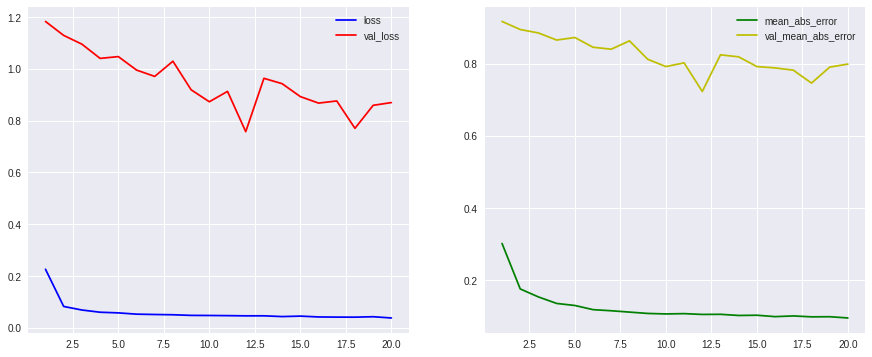

In [231]:
train_result = model_4_hist.history
epoch = np.arange(1, 20 + 1)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epoch, train_result['loss'], label='loss', c='b')
plt.plot(epoch, train_result['val_loss'], label='val_loss', c='r')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_result['mean_absolute_error'], label='mean_abs_error', c='g')
plt.plot(epoch, train_result['val_mean_absolute_error'], label='val_mean_abs_error', c='y')
plt.legend()

In [0]:
y_pred = model.predict_generator(test_gen)

In [233]:
y_pred.shape

(94, 14)

In [0]:
y_pred_df = pd.DataFrame(y_pred)

In [239]:
y_pred_df.head()

0         1         2   ...        11        12        13
0 -0.088052 -0.397974 -0.402367  ... -1.092044 -1.125545  0.273172
1 -0.150158 -0.394987 -0.397481  ... -1.090321 -1.101974  0.325746
2 -0.151750 -0.399934 -0.402040  ... -1.099892 -1.113198  0.332261
3  0.018569 -0.392657 -0.380968  ... -1.000489 -1.069518  0.130329
4 -0.006549 -0.396911 -0.395125  ... -1.060613 -1.120788  0.193336

[5 rows x 14 columns]

In [0]:
y_predict_true = y_test_target[6:]

In [0]:
y_true_df = pd.DataFrame(y_predict_true)

In [241]:
y_true_df.head()

0         1         2   ...        11        12        13
0 -0.657113 -2.346574 -2.277906  ... -0.336819 -0.546944  0.400371
1 -0.646746 -2.405851 -2.336281  ... -0.505224 -0.613680  0.222090
2 -0.642599 -2.422317 -2.352496  ... -0.666308 -0.675282 -0.355455
3 -0.619790 -2.463481 -2.394656  ... -0.658986 -0.803621  0.106794
4 -0.617716 -2.476654 -2.407628  ... -0.893290 -0.998696  0.345926

[5 rows x 14 columns]

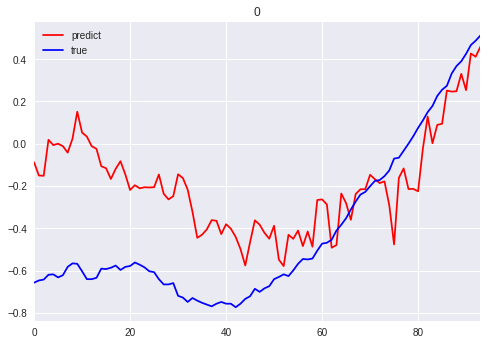

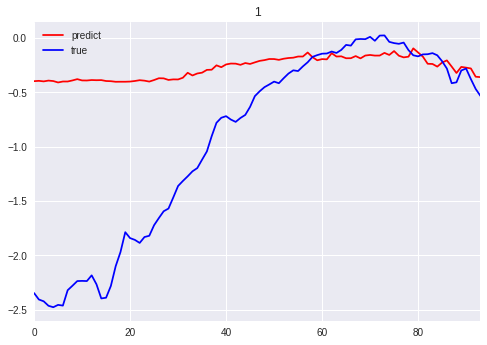

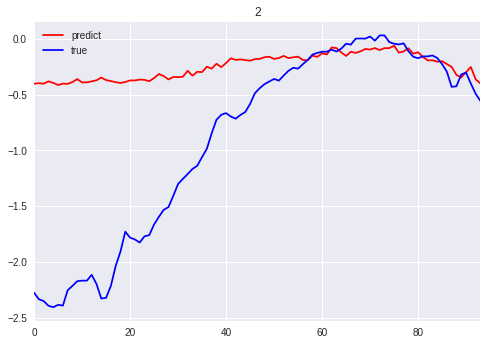

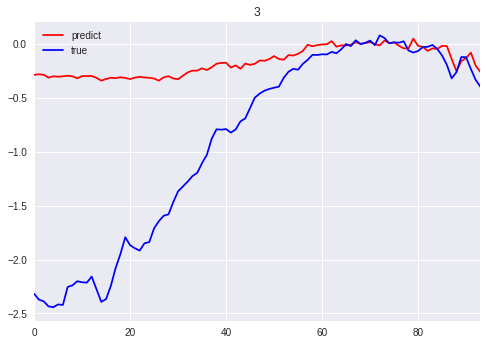

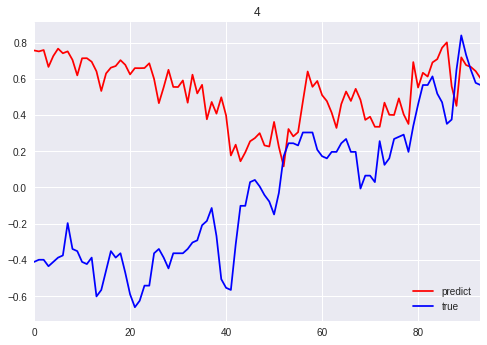

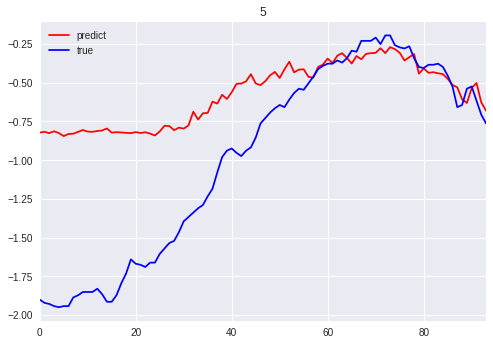

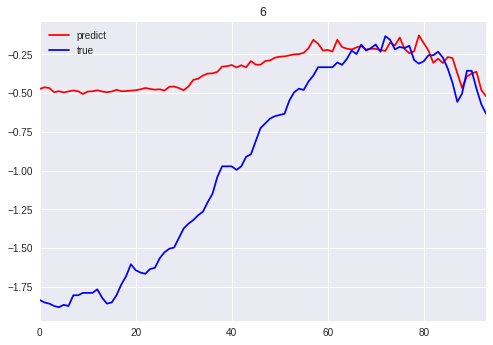

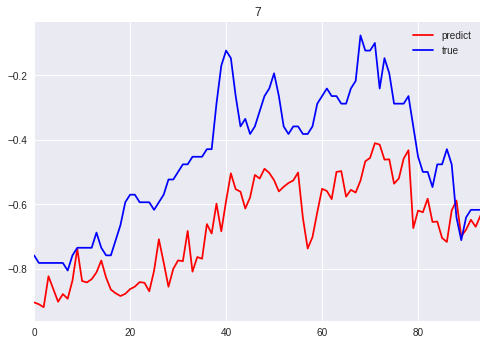

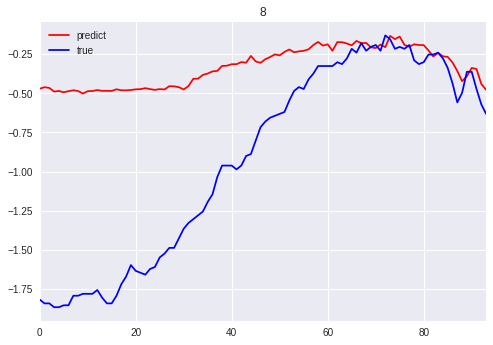

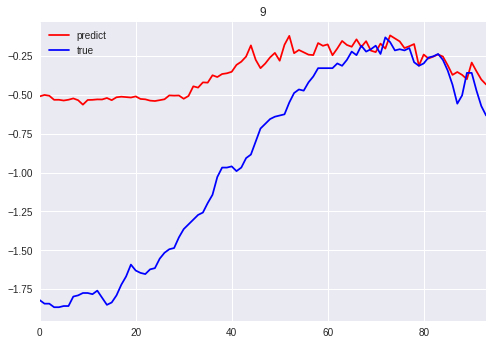

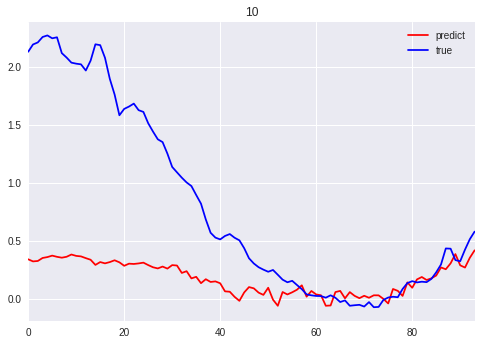

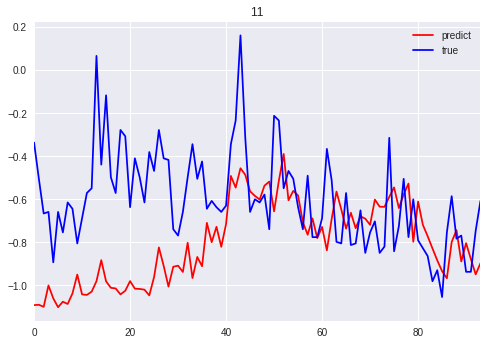

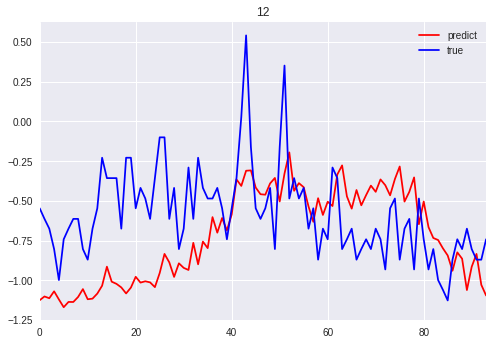

In [243]:
# 테스트 데이터
for i in range(13):
  plt.figure()
  y_pred_df.iloc[:, i].plot(c='r', label='predict')
  y_true_df.iloc[:, i].plot(c='b', label='true')
  plt.legend()
  plt.title(i)

# 5) 다변량 (X1, X2, ... Xn, y)에 대한 (x1, x2, ...Xn, y)에 대한 예측값

In [0]:
## 각 변수별 예측 값 확인을 위한 data frame 화

train_df = pd.DataFrame(train_data)
valid_df = pd.DataFrame(valid_data)
test_df = pd.DataFrame(test_data)

In [245]:
train_df.head()

0         1         2   ...        11        12        13
0  0.267689 -0.071004 -0.087228  ... -0.395395 -0.485341 -0.123796
1  0.278056 -0.135220 -0.150468  ... -0.622376 -0.613680 -0.296740
2  0.269762 -0.151686 -0.166683  ... -1.010442 -1.060299  0.082241
3  0.265615 -0.118754 -0.132631  ... -0.900612 -1.127035  0.364074
4  0.265615 -0.112168 -0.127766  ... -0.915256 -1.060299  0.538085

[5 rows x 14 columns]

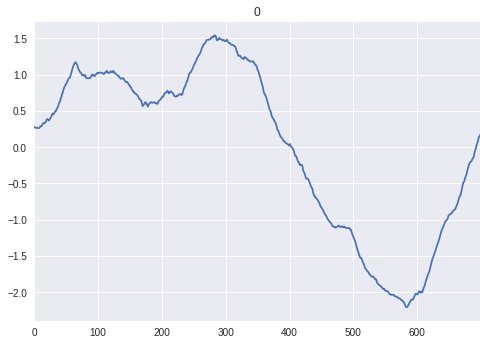

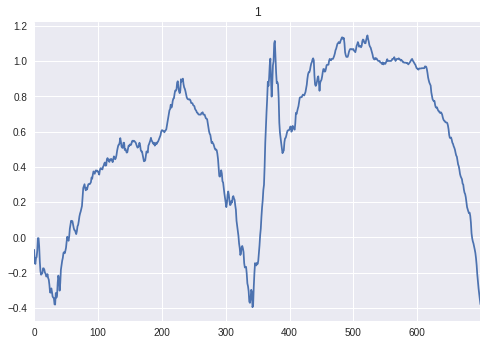

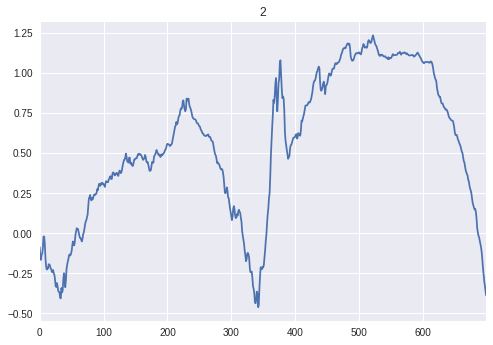

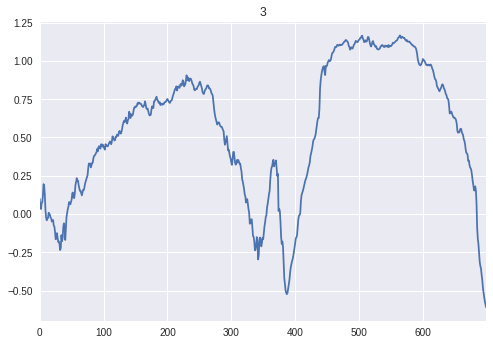

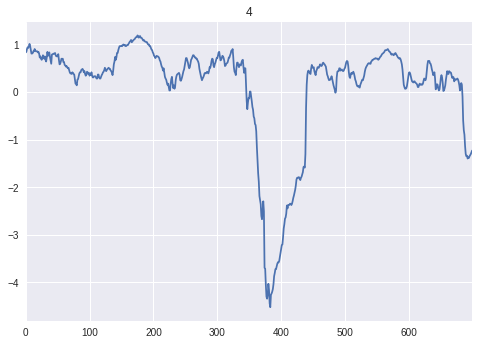

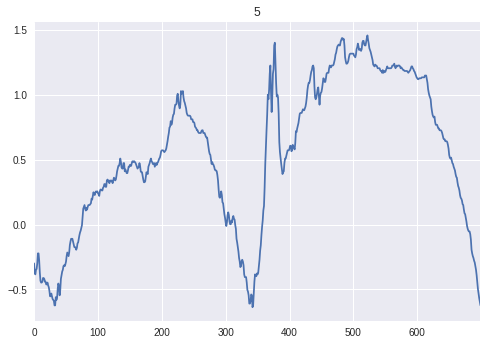

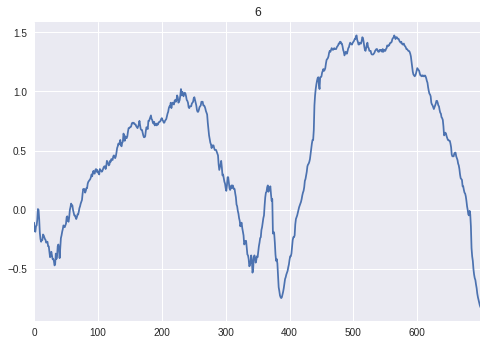

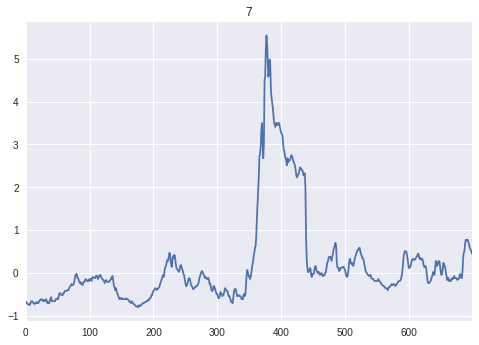

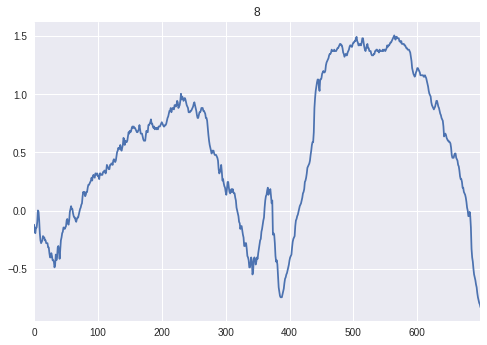

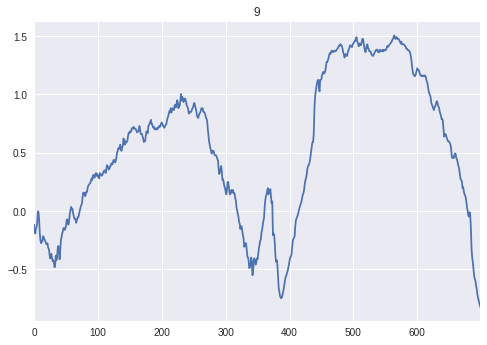

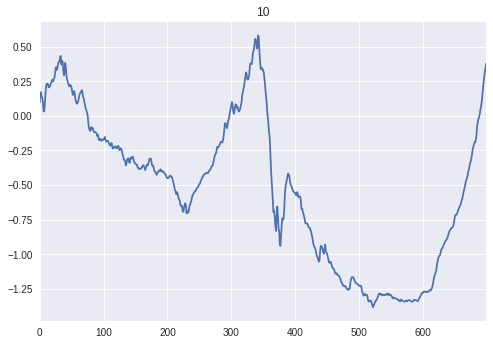

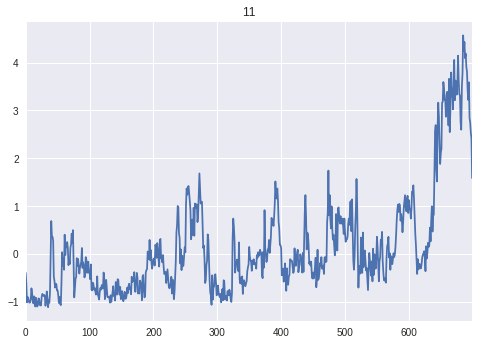

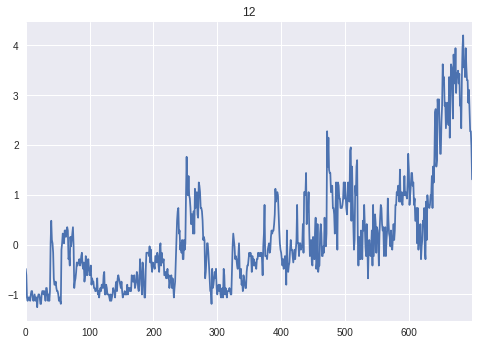

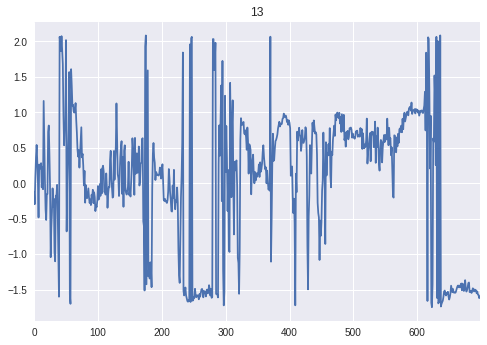

In [246]:
# 학습데이터

for i in train_df.columns:
  plt.figure()
  train_df.iloc[:, i].plot()
  plt.title(i)

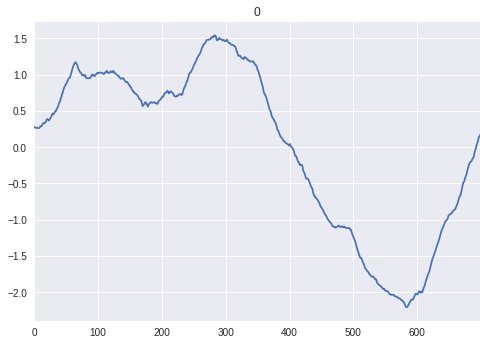

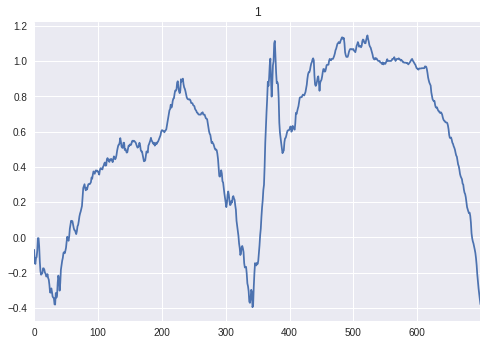

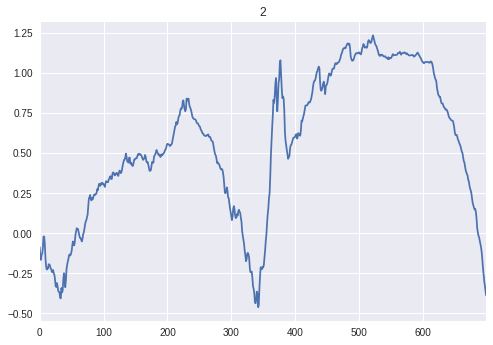

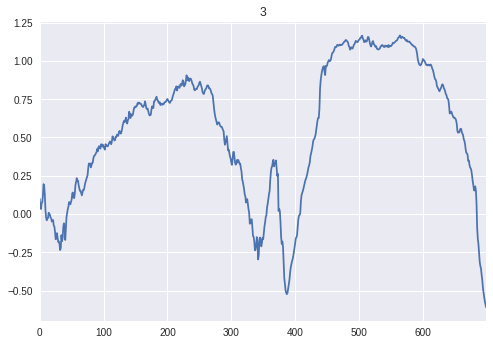

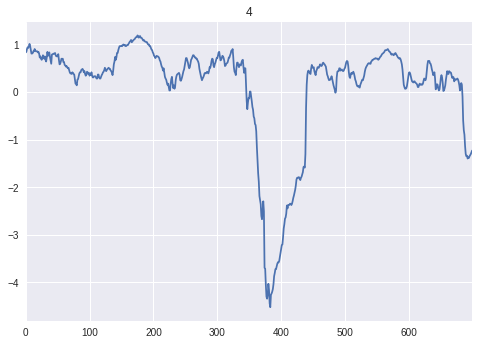

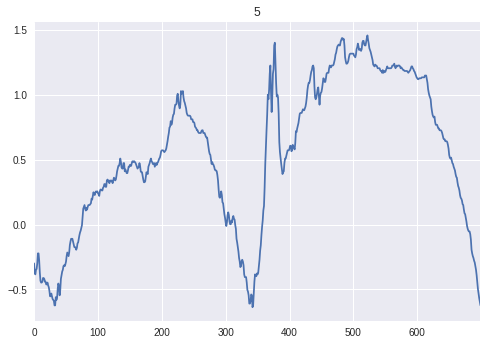

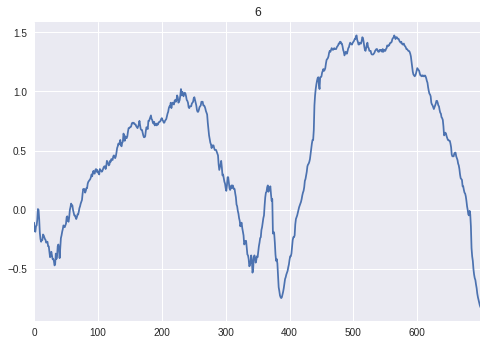

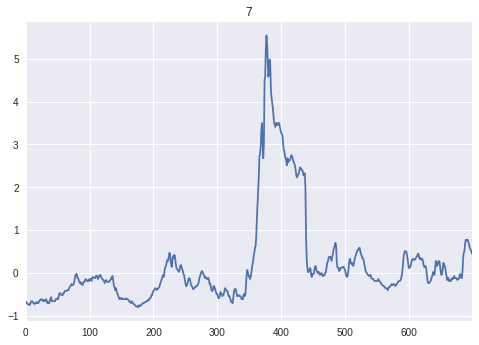

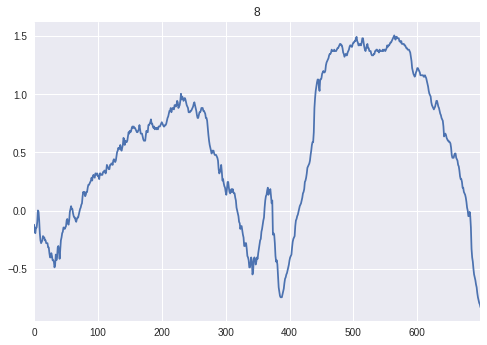

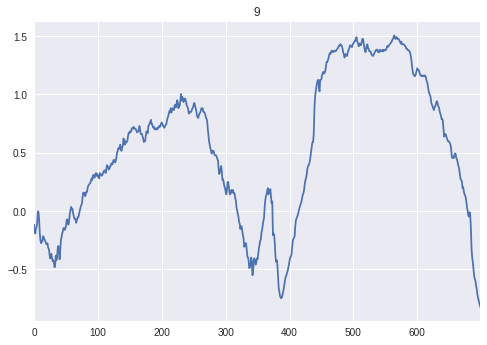

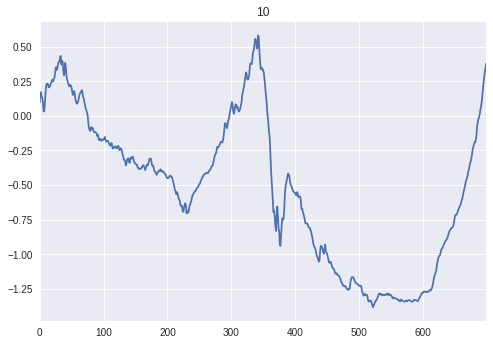

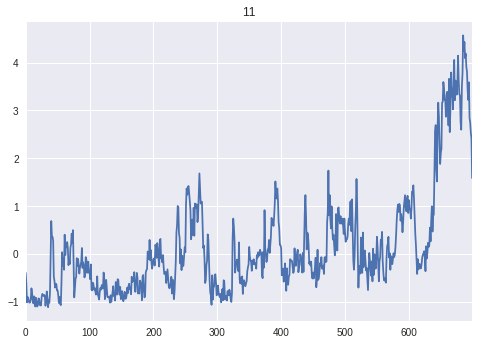

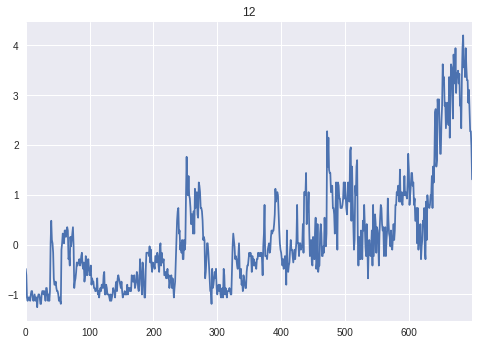

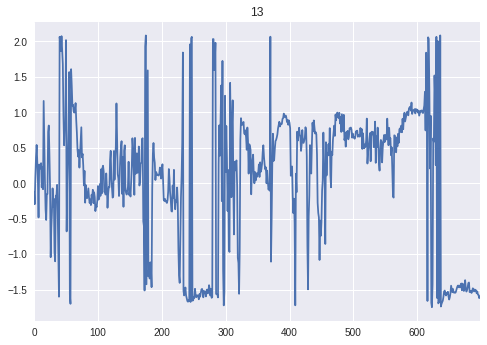

In [247]:
# 검증 데이터
for i in valid_df.columns:
  plt.figure()
  train_df.iloc[:, i].plot()
  plt.title(i)

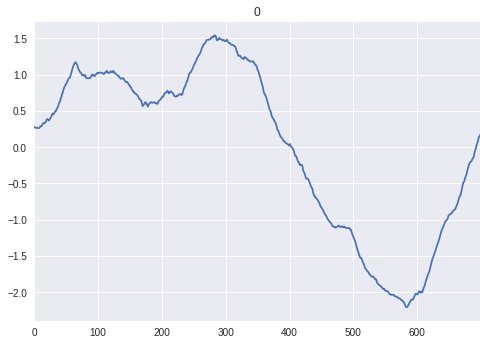

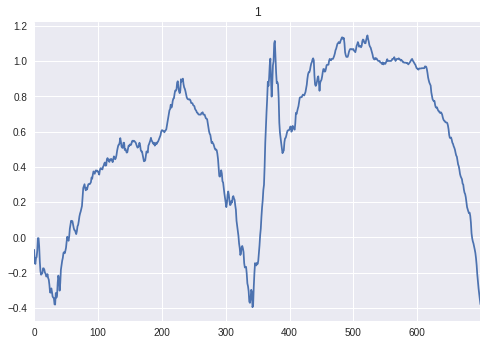

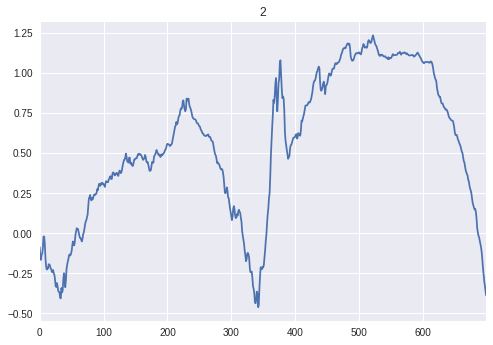

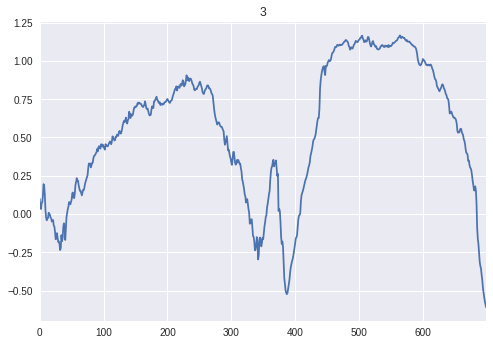

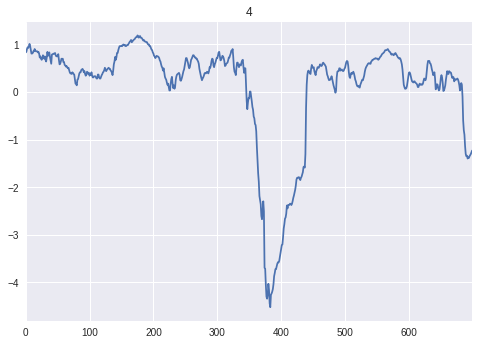

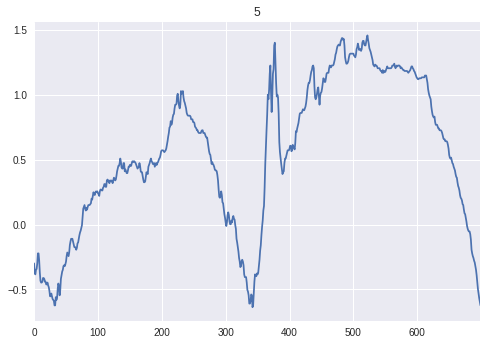

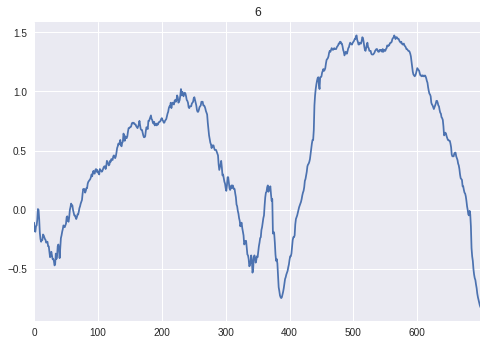

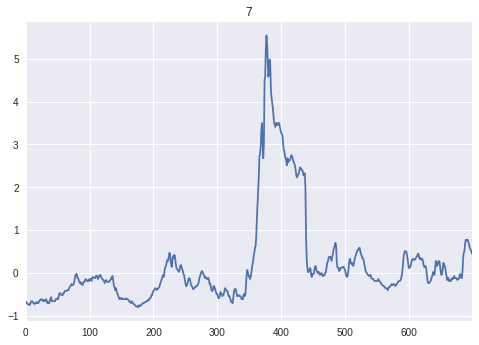

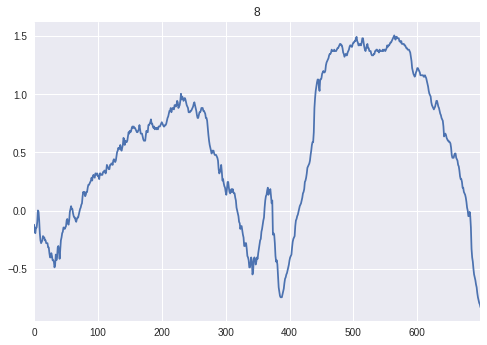

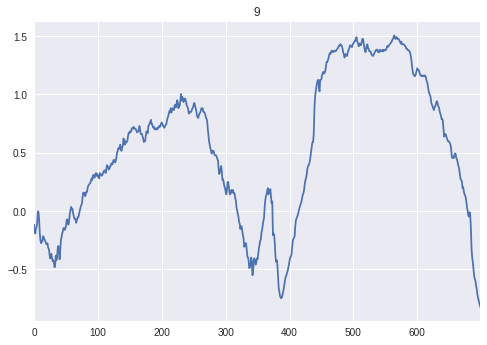

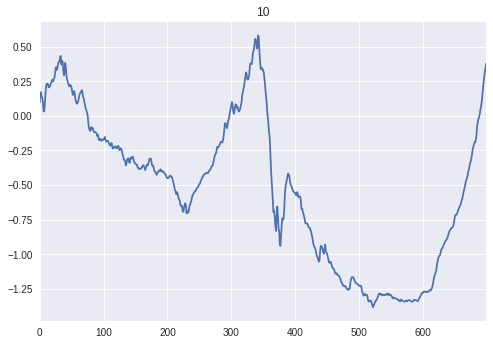

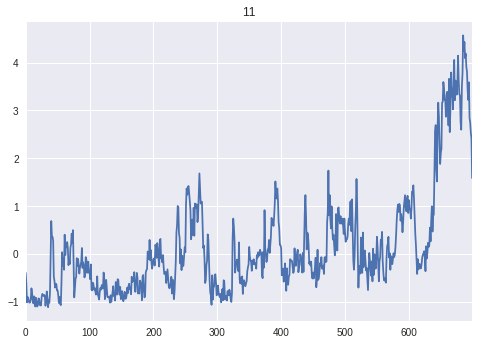

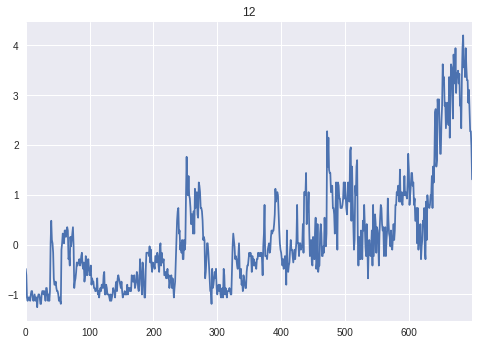

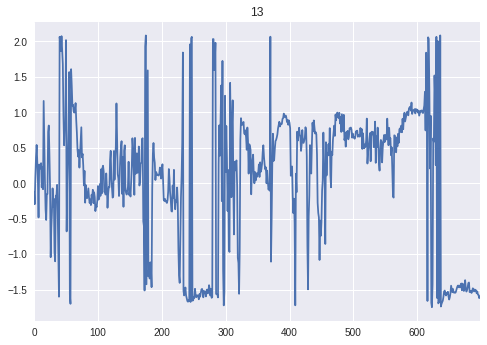

In [248]:
# 테스트 데이터
for i in test_df.columns:
  plt.figure()
  train_df.iloc[:, i].plot()
  plt.title(i)

In [250]:
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

(700, 14)
(200, 14)
(100, 14)


In [0]:
# 다별량에 대한 예측

y_train_data = train_data[:, :]
y_train_target = train_data[:, :]

y_valid_data = valid_data[:, :]
y_valid_target = valid_data[:, :]

y_test_data = test_data[:, :]
y_test_target = test_data[:, :]

In [252]:
print(y_train_data.shape)
print(y_train_target.shape)

print(y_valid_data.shape)
print(y_valid_target.shape)

print(y_test_data.shape)
print(y_test_target.shape)

(700, 14)
(700, 14)
(200, 14)
(200, 14)
(100, 14)
(100, 14)


In [0]:
train_gen = TimeseriesGenerator(y_train_data, y_train_target, length=6, batch_size=1)

valid_gen = TimeseriesGenerator(y_valid_data, y_valid_target, length=6, batch_size=1)

test_gen = TimeseriesGenerator(y_test_data, y_test_target, length=6, batch_size=1)

In [254]:
y_train_data[:6, :]

array([[ 0.26768875, -0.07100373, -0.08722823,  0.09900754,  0.82751403,
        -0.29939742, -0.1107857 , -0.6636669 , -0.11942343, -0.11534179,
         0.09565574, -0.39539462, -0.48534109, -0.12379648],
       [ 0.27805649, -0.13522027, -0.15046764,  0.03793642,  0.83942126,
        -0.36963234, -0.18005563, -0.68718451, -0.18047835, -0.18386167,
         0.15806104, -0.62237621, -0.61367981, -0.29673968],
       [ 0.2697623 , -0.15168604, -0.16668287,  0.03311501,  0.89895738,
        -0.38367933, -0.18775229, -0.71070212, -0.19268934, -0.19147499,
         0.17145534, -1.01044152, -1.06029854,  0.08224079],
       [ 0.2656152 , -0.11875449, -0.13263088,  0.07168625,  0.93467906,
        -0.34856187, -0.14157234, -0.73421972, -0.1438454 , -0.14579507,
         0.13949166, -0.90061171, -1.12703468,  0.36407416],
       [ 0.2656152 , -0.11216818, -0.12776631,  0.07650765,  0.92277183,
        -0.34153837, -0.13387568, -0.73421972, -0.1438454 , -0.13818175,
         0.13370775, -0.91

In [255]:
## 6개의 데이터를 통해 7번째를 예측하는 제네레이터

counter = 0
for i in train_gen:
  print('학습')
  print(i[0])
  print('--\n')
  print('정답')
  print(i[1])
  counter +=1
  if counter == 1:
    break

학습
[[[ 0.26768875 -0.07100373 -0.08722823  0.09900754  0.82751403
   -0.29939742 -0.1107857  -0.6636669  -0.11942343 -0.11534179
    0.09565574 -0.39539462 -0.48534109 -0.12379648]
  [ 0.27805649 -0.13522027 -0.15046764  0.03793642  0.83942126
   -0.36963234 -0.18005563 -0.68718451 -0.18047835 -0.18386167
    0.15806104 -0.62237621 -0.61367981 -0.29673968]
  [ 0.2697623  -0.15168604 -0.16668287  0.03311501  0.89895738
   -0.38367933 -0.18775229 -0.71070212 -0.19268934 -0.19147499
    0.17145534 -1.01044152 -1.06029854  0.08224079]
  [ 0.2656152  -0.11875449 -0.13263088  0.07168625  0.93467906
   -0.34856187 -0.14157234 -0.73421972 -0.1438454  -0.14579507
    0.13949166 -0.90061171 -1.12703468  0.36407416]
  [ 0.2656152  -0.11216818 -0.12776631  0.07650765  0.92277183
   -0.34153837 -0.13387568 -0.73421972 -0.1438454  -0.13818175
    0.13370775 -0.91525569 -1.06029854  0.53808491]
  [ 0.26354165 -0.07594346 -0.09047128  0.11829316  0.95849351
   -0.29939742 -0.08769573 -0.73421972 -0.09

In [0]:
# 제네레이터와 데이터와 같은지 확인
# 아무표시도 없으면 같음

assert i[0].all() == y_train_data[:6, :].all()

In [0]:
model = models.Sequential()
model.add(layers.LSTM(64, input_shape=(6,14)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(14))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [258]:
train_gen.end_index // train_gen.batch_size

699

In [259]:
valid_gen.end_index // valid_gen.batch_size

199

In [262]:
model_5_hist = model.fit_generator(train_gen, 
                    steps_per_epoch=train_gen.end_index // train_gen.batch_size, 
                    epochs=20, 
                    validation_data=valid_gen, 
                    validation_steps=valid_gen.end_index // valid_gen.batch_size )

Epoch 1/20
699/699 [==============================] - 14s 20ms/step - loss: 0.2631 - mean_absolute_error: 0.3028 - val_loss: 1.2203 - val_mean_absolute_error: 0.9336
Epoch 2/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0798 - mean_absolute_error: 0.1645 - val_loss: 1.0279 - val_mean_absolute_error: 0.8624
Epoch 3/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0661 - mean_absolute_error: 0.1447 - val_loss: 0.9041 - val_mean_absolute_error: 0.8037
Epoch 4/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0622 - mean_absolute_error: 0.1376 - val_loss: 0.9121 - val_mean_absolute_error: 0.8014
Epoch 5/20
699/699 [==============================] - 13s 19ms/step - loss: 0.0590 - mean_absolute_error: 0.1268 - val_loss: 0.8796 - val_mean_absolute_error: 0.7907
Epoch 6/20
699/699 [==============================] - 13s 18ms/step - loss: 0.0544 - mean_absolute_error: 0.1211 - val_loss: 0.9178 - val_mean_absolute_error: 0.8008
Epoc

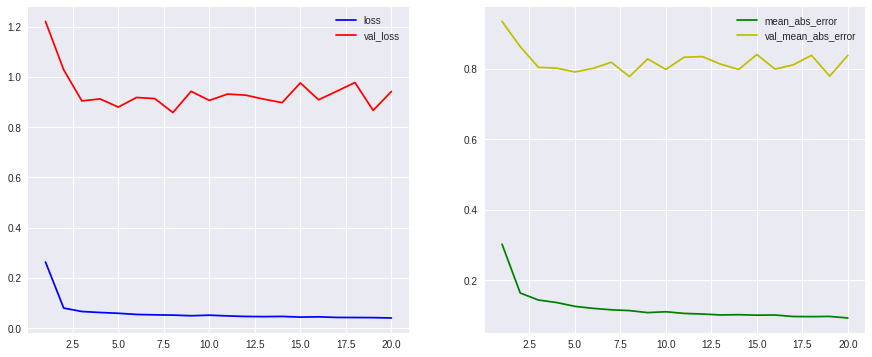

In [263]:
train_result = model_5_hist.history
epoch = np.arange(1, 20 + 1)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epoch, train_result['loss'], label='loss', c='b')
plt.plot(epoch, train_result['val_loss'], label='val_loss', c='r')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_result['mean_absolute_error'], label='mean_abs_error', c='g')
plt.plot(epoch, train_result['val_mean_absolute_error'], label='val_mean_abs_error', c='y')
plt.legend()

In [0]:
y_pred = model.predict_generator(test_gen)

In [265]:
y_pred.shape

(94, 14)

In [0]:
y_pred_df = pd.DataFrame(y_pred)

In [267]:
y_pred_df.head()

0         1         2   ...        11        12        13
0 -0.131712 -0.620755 -0.195812  ... -1.131591 -1.391324 -0.799059
1 -0.184565 -0.605143 -0.209123  ... -1.102874 -1.321809 -0.725837
2 -0.097812 -0.625781 -0.216987  ... -1.127596 -1.390665 -0.792319
3 -0.042702 -0.660717 -0.172842  ... -1.118440 -1.499073 -0.969555
4 -0.008997 -0.646229 -0.212281  ... -1.189817 -1.490938 -0.880753

[5 rows x 14 columns]

In [0]:
y_predict_true = y_test_target[6:]

In [0]:
y_true_df = pd.DataFrame(y_predict_true)

In [270]:
y_true_df.head()

0         1         2   ...        11        12        13
0 -0.657113 -2.346574 -2.277906  ... -0.336819 -0.546944  0.400371
1 -0.646746 -2.405851 -2.336281  ... -0.505224 -0.613680  0.222090
2 -0.642599 -2.422317 -2.352496  ... -0.666308 -0.675282 -0.355455
3 -0.619790 -2.463481 -2.394656  ... -0.658986 -0.803621  0.106794
4 -0.617716 -2.476654 -2.407628  ... -0.893290 -0.998696  0.345926

[5 rows x 14 columns]

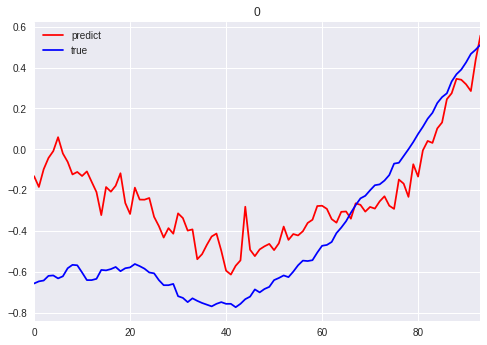

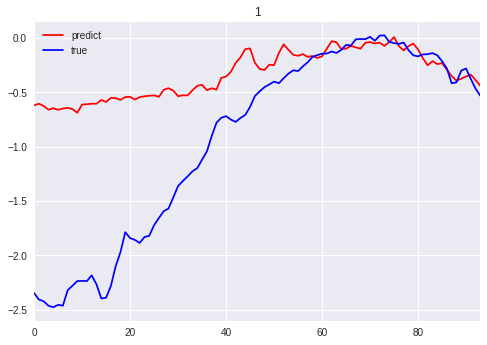

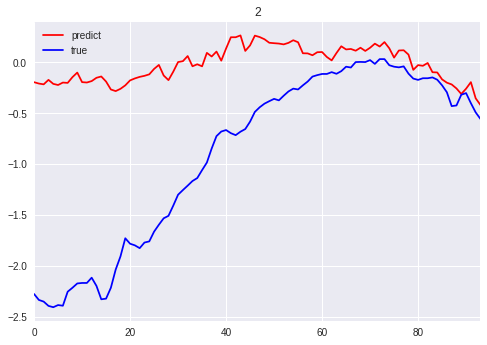

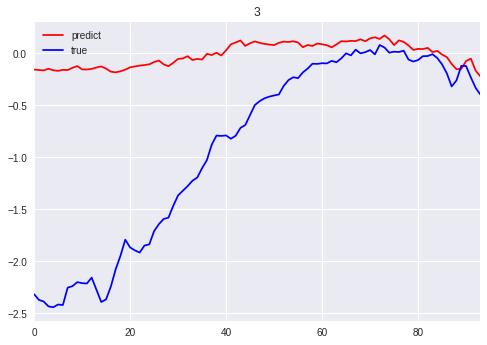

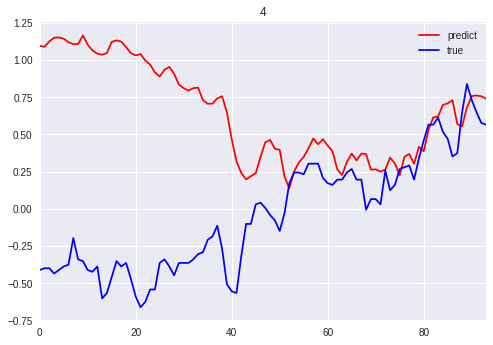

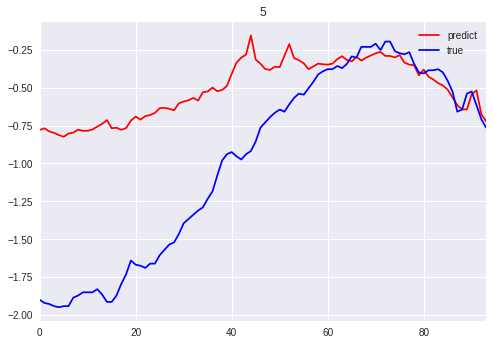

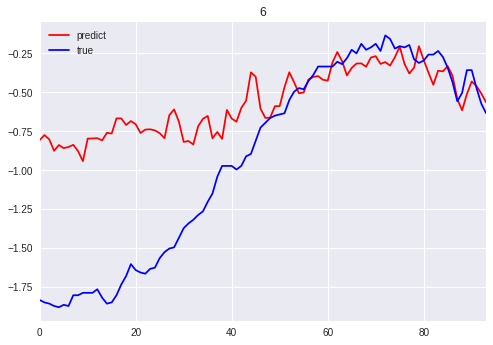

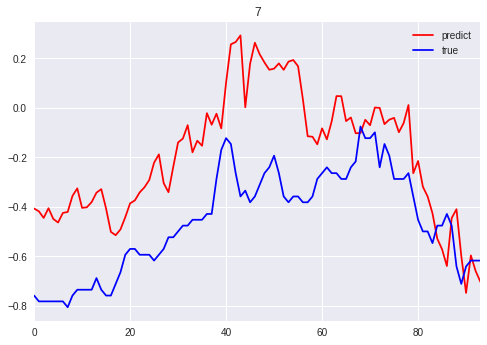

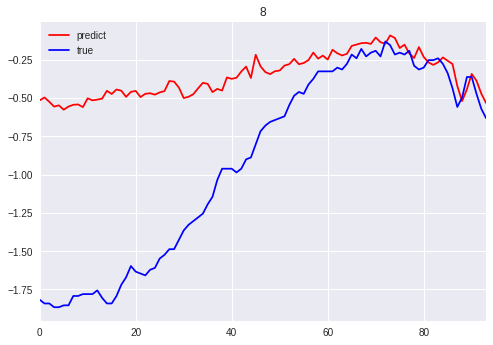

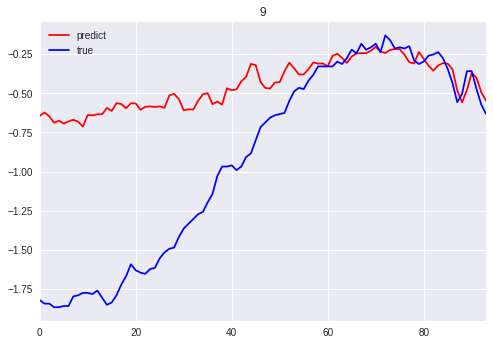

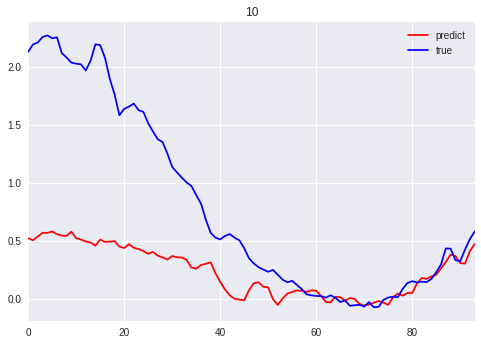

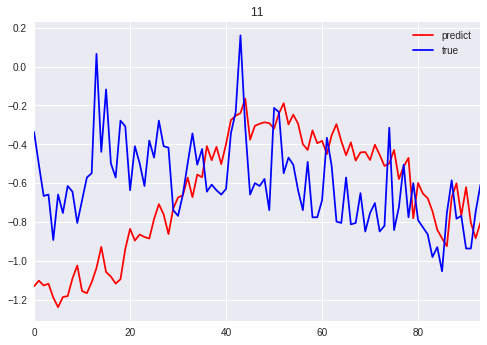

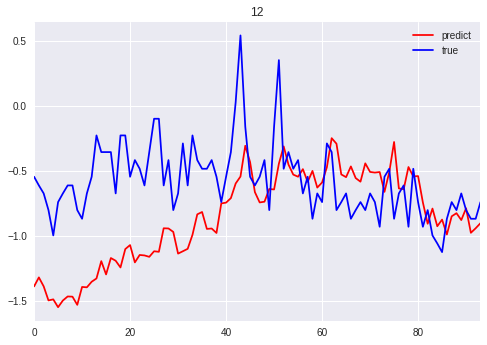

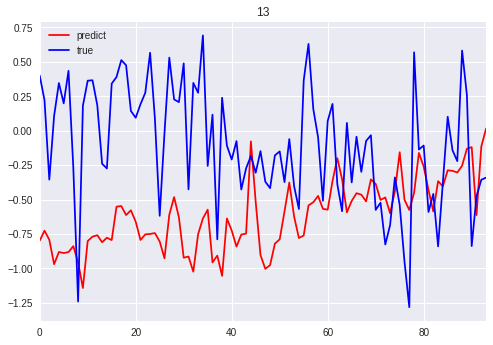

In [271]:
# 테스트 데이터
for i in range(14):
  plt.figure()
  y_pred_df.iloc[:, i].plot(c='r', label='predict')
  y_true_df.iloc[:, i].plot(c='b', label='true')
  plt.legend()
  plt.title(i)

# 추가 - 2)번 관련 
# LSTM 대체 - Conv1D

In [272]:
train_data[0]

array([ 0.26768875, -0.07100373, -0.08722823,  0.09900754,  0.82751403,
       -0.29939742, -0.1107857 , -0.6636669 , -0.11942343, -0.11534179,
        0.09565574, -0.39539462, -0.48534109, -0.12379648])

In [273]:
train_data[0].shape

(14,)

In [274]:
train_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]].shape

(700, 13)

In [0]:
# 단별량에 대한 예측
# y = data[1]

y_train_data = train_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_train_target = train_data[:, 1]

y_valid_data = valid_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_valid_target = valid_data[:, 1]

y_test_data = test_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_test_target = test_data[:, 1]

In [276]:
print(y_train_data.shape)
print(y_train_target.shape)

print(y_valid_data.shape)
print(y_valid_target.shape)

print(y_test_data.shape)
print(y_test_target.shape)

(700, 13)
(700,)
(200, 13)
(200,)
(100, 13)
(100,)


In [0]:
train_gen = TimeseriesGenerator(y_train_data, y_train_target, length=6, batch_size=1)

valid_gen = TimeseriesGenerator(y_valid_data, y_valid_target, length=6, batch_size=1)

test_gen = TimeseriesGenerator(y_test_data, y_test_target, length=6, batch_size=1)

In [278]:
y_train_data[:6, :]

array([[ 0.26768875, -0.08722823,  0.09900754,  0.82751403, -0.29939742,
        -0.1107857 , -0.6636669 , -0.11942343, -0.11534179,  0.09565574,
        -0.39539462, -0.48534109, -0.12379648],
       [ 0.27805649, -0.15046764,  0.03793642,  0.83942126, -0.36963234,
        -0.18005563, -0.68718451, -0.18047835, -0.18386167,  0.15806104,
        -0.62237621, -0.61367981, -0.29673968],
       [ 0.2697623 , -0.16668287,  0.03311501,  0.89895738, -0.38367933,
        -0.18775229, -0.71070212, -0.19268934, -0.19147499,  0.17145534,
        -1.01044152, -1.06029854,  0.08224079],
       [ 0.2656152 , -0.13263088,  0.07168625,  0.93467906, -0.34856187,
        -0.14157234, -0.73421972, -0.1438454 , -0.14579507,  0.13949166,
        -0.90061171, -1.12703468,  0.36407416],
       [ 0.2656152 , -0.12776631,  0.07650765,  0.92277183, -0.34153837,
        -0.13387568, -0.73421972, -0.1438454 , -0.13818175,  0.13370775,
        -0.91525569, -1.06029854,  0.53808491],
       [ 0.26354165, -0.090471

In [279]:
## 6개의 데이터를 통해 7번째를 예측하는 제네레이터

counter = 0
for i in train_gen:
  print('학습')
  print(i[0])
  print('--\n')
  print('정답')
  print(i[1])
  counter +=1
  if counter == 1:
    break

학습
[[[ 0.26768875 -0.08722823  0.09900754  0.82751403 -0.29939742
   -0.1107857  -0.6636669  -0.11942343 -0.11534179  0.09565574
   -0.39539462 -0.48534109 -0.12379648]
  [ 0.27805649 -0.15046764  0.03793642  0.83942126 -0.36963234
   -0.18005563 -0.68718451 -0.18047835 -0.18386167  0.15806104
   -0.62237621 -0.61367981 -0.29673968]
  [ 0.2697623  -0.16668287  0.03311501  0.89895738 -0.38367933
   -0.18775229 -0.71070212 -0.19268934 -0.19147499  0.17145534
   -1.01044152 -1.06029854  0.08224079]
  [ 0.2656152  -0.13263088  0.07168625  0.93467906 -0.34856187
   -0.14157234 -0.73421972 -0.1438454  -0.14579507  0.13949166
   -0.90061171 -1.12703468  0.36407416]
  [ 0.2656152  -0.12776631  0.07650765  0.92277183 -0.34153837
   -0.13387568 -0.73421972 -0.1438454  -0.13818175  0.13370775
   -0.91525569 -1.06029854  0.53808491]
  [ 0.26354165 -0.09047128  0.11829316  0.95849351 -0.29939742
   -0.08769573 -0.73421972 -0.09500146 -0.09250183  0.09900432
   -0.99579754 -1.06029854  0.30749397]]]

In [0]:
# 제네레이터와 데이터와 같은지 확인
# 아무표시도 없으면 같음

assert i[0].all() == y_train_data[:6, :].all()

In [0]:
model = models.Sequential()
model.add(layers.Conv1D(64, 3, padding='valid', activation='relu', input_shape=(6,13)))
model.add(layers.MaxPool1D())
model.add(layers.Flatten())
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [301]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 4, 64)             2560      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 12)                1548      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 13        
Total params: 4,121
Trainable params: 4,121
Non-trainable params: 0
_________________________________________________________________


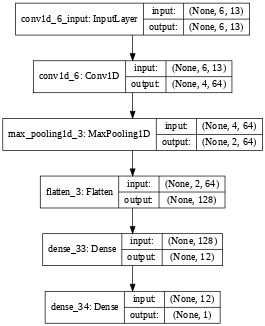

In [300]:
plot_model(model, show_shapes=True, dpi=50)

In [302]:
train_gen.end_index // train_gen.batch_size

699

In [303]:
valid_gen.end_index // valid_gen.batch_size

199

In [304]:
model_6_hist = model.fit_generator(train_gen, 
                    steps_per_epoch=train_gen.end_index // train_gen.batch_size, 
                    epochs=20, 
                    validation_data=valid_gen, 
                    validation_steps=valid_gen.end_index // valid_gen.batch_size )

Epoch 1/20
699/699 [==============================] - 9s 13ms/step - loss: 0.0282 - mean_absolute_error: 0.1191 - val_loss: 0.7509 - val_mean_absolute_error: 0.7746
Epoch 2/20
699/699 [==============================] - 4s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0659 - val_loss: 0.6885 - val_mean_absolute_error: 0.7366
Epoch 3/20
699/699 [==============================] - 4s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0593 - val_loss: 0.6027 - val_mean_absolute_error: 0.6785
Epoch 4/20
699/699 [==============================] - 4s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0477 - val_loss: 0.9094 - val_mean_absolute_error: 0.8382
Epoch 5/20
699/699 [==============================] - 4s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0444 - val_loss: 0.5985 - val_mean_absolute_error: 0.6743
Epoch 6/20
699/699 [==============================] - 4s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0475 - val_loss: 0.7978 - val_mean_absolute_error: 0.7990
Epoch 7/20
699/

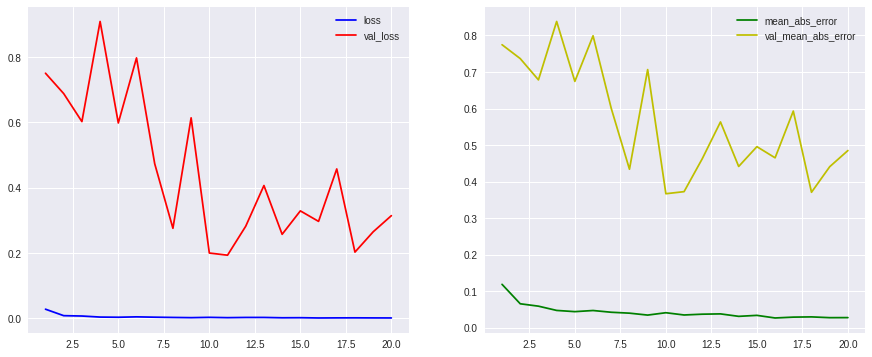

In [305]:
train_result = model_6_hist.history
epoch = np.arange(1, 20 + 1)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epoch, train_result['loss'], label='loss', c='b')
plt.plot(epoch, train_result['val_loss'], label='val_loss', c='r')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_result['mean_absolute_error'], label='mean_abs_error', c='g')
plt.plot(epoch, train_result['val_mean_absolute_error'], label='val_mean_abs_error', c='y')
plt.legend()

In [0]:
y_pred = model.predict_generator(test_gen)

In [307]:
y_pred.shape

(94, 1)

In [0]:
y_predict_true = y_test_target[6:]

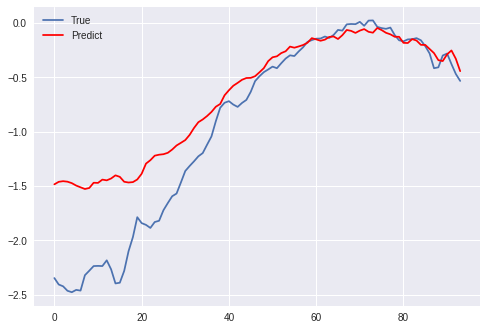

In [309]:
plt.plot(y_predict_true, label = 'True')
plt.plot(y_pred, c='r', label='Predict')
plt.legend()

# LSTM + Conv1 활용

In [0]:
# 단별량에 대한 예측
# y = data[1]

y_train_data = train_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_train_target = train_data[:, 1]

y_valid_data = valid_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_valid_target = valid_data[:, 1]

y_test_data = test_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_test_target = test_data[:, 1]

In [311]:
print(y_train_data.shape)
print(y_train_target.shape)

print(y_valid_data.shape)
print(y_valid_target.shape)

print(y_test_data.shape)
print(y_test_target.shape)

(700, 13)
(700,)
(200, 13)
(200,)
(100, 13)
(100,)


In [0]:
train_gen = TimeseriesGenerator(y_train_data, y_train_target, length=6, batch_size=1)

valid_gen = TimeseriesGenerator(y_valid_data, y_valid_target, length=6, batch_size=1)

test_gen = TimeseriesGenerator(y_test_data, y_test_target, length=6, batch_size=1)

In [313]:
y_train_data[:6, :]

array([[ 0.26768875, -0.08722823,  0.09900754,  0.82751403, -0.29939742,
        -0.1107857 , -0.6636669 , -0.11942343, -0.11534179,  0.09565574,
        -0.39539462, -0.48534109, -0.12379648],
       [ 0.27805649, -0.15046764,  0.03793642,  0.83942126, -0.36963234,
        -0.18005563, -0.68718451, -0.18047835, -0.18386167,  0.15806104,
        -0.62237621, -0.61367981, -0.29673968],
       [ 0.2697623 , -0.16668287,  0.03311501,  0.89895738, -0.38367933,
        -0.18775229, -0.71070212, -0.19268934, -0.19147499,  0.17145534,
        -1.01044152, -1.06029854,  0.08224079],
       [ 0.2656152 , -0.13263088,  0.07168625,  0.93467906, -0.34856187,
        -0.14157234, -0.73421972, -0.1438454 , -0.14579507,  0.13949166,
        -0.90061171, -1.12703468,  0.36407416],
       [ 0.2656152 , -0.12776631,  0.07650765,  0.92277183, -0.34153837,
        -0.13387568, -0.73421972, -0.1438454 , -0.13818175,  0.13370775,
        -0.91525569, -1.06029854,  0.53808491],
       [ 0.26354165, -0.090471

In [314]:
## 6개의 데이터를 통해 7번째를 예측하는 제네레이터

counter = 0
for i in train_gen:
  print('학습')
  print(i[0])
  print('--\n')
  print('정답')
  print(i[1])
  counter +=1
  if counter == 1:
    break

학습
[[[ 0.26768875 -0.08722823  0.09900754  0.82751403 -0.29939742
   -0.1107857  -0.6636669  -0.11942343 -0.11534179  0.09565574
   -0.39539462 -0.48534109 -0.12379648]
  [ 0.27805649 -0.15046764  0.03793642  0.83942126 -0.36963234
   -0.18005563 -0.68718451 -0.18047835 -0.18386167  0.15806104
   -0.62237621 -0.61367981 -0.29673968]
  [ 0.2697623  -0.16668287  0.03311501  0.89895738 -0.38367933
   -0.18775229 -0.71070212 -0.19268934 -0.19147499  0.17145534
   -1.01044152 -1.06029854  0.08224079]
  [ 0.2656152  -0.13263088  0.07168625  0.93467906 -0.34856187
   -0.14157234 -0.73421972 -0.1438454  -0.14579507  0.13949166
   -0.90061171 -1.12703468  0.36407416]
  [ 0.2656152  -0.12776631  0.07650765  0.92277183 -0.34153837
   -0.13387568 -0.73421972 -0.1438454  -0.13818175  0.13370775
   -0.91525569 -1.06029854  0.53808491]
  [ 0.26354165 -0.09047128  0.11829316  0.95849351 -0.29939742
   -0.08769573 -0.73421972 -0.09500146 -0.09250183  0.09900432
   -0.99579754 -1.06029854  0.30749397]]]

In [0]:
# 제네레이터와 데이터와 같은지 확인
# 아무표시도 없으면 같음

assert i[0].all() == y_train_data[:6, :].all()

In [0]:
model = models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, input_shape=(6,13)))
model.add(layers.Conv1D(64, 3, padding='valid', activation='relu'))
model.add(layers.MaxPool1D())
model.add(layers.Flatten())
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [319]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 6, 64)             19968     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 4, 64)             12352     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 12)                1548      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 13        
Total params: 33,881
Trainable params: 33,881
Non-trainable params: 0
_________________________________________________

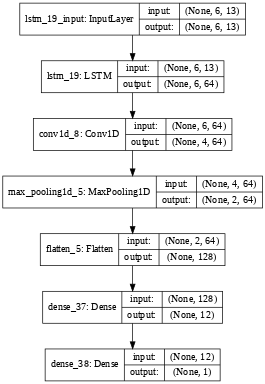

In [320]:
plot_model(model, show_shapes=True, dpi=50)

In [321]:
train_gen.end_index // train_gen.batch_size

699

In [322]:
valid_gen.end_index // valid_gen.batch_size

199

In [323]:
model_7_hist = model.fit_generator(train_gen, 
                    steps_per_epoch=train_gen.end_index // train_gen.batch_size, 
                    epochs=20, 
                    validation_data=valid_gen, 
                    validation_steps=valid_gen.end_index // valid_gen.batch_size )

Epoch 1/20
699/699 [==============================] - 17s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0815 - val_loss: 0.7781 - val_mean_absolute_error: 0.7754
Epoch 2/20
699/699 [==============================] - 14s 20ms/step - loss: 0.0059 - mean_absolute_error: 0.0570 - val_loss: 0.9406 - val_mean_absolute_error: 0.8673
Epoch 3/20
699/699 [==============================] - 14s 20ms/step - loss: 0.0038 - mean_absolute_error: 0.0460 - val_loss: 0.8934 - val_mean_absolute_error: 0.8402
Epoch 4/20
699/699 [==============================] - 14s 20ms/step - loss: 0.0039 - mean_absolute_error: 0.0464 - val_loss: 0.6946 - val_mean_absolute_error: 0.7275
Epoch 5/20
699/699 [==============================] - 14s 20ms/step - loss: 0.0032 - mean_absolute_error: 0.0402 - val_loss: 0.7254 - val_mean_absolute_error: 0.7357
Epoch 6/20
699/699 [==============================] - 14s 20ms/step - loss: 0.0031 - mean_absolute_error: 0.0419 - val_loss: 0.4606 - val_mean_absolute_error: 0.5565
Epoc

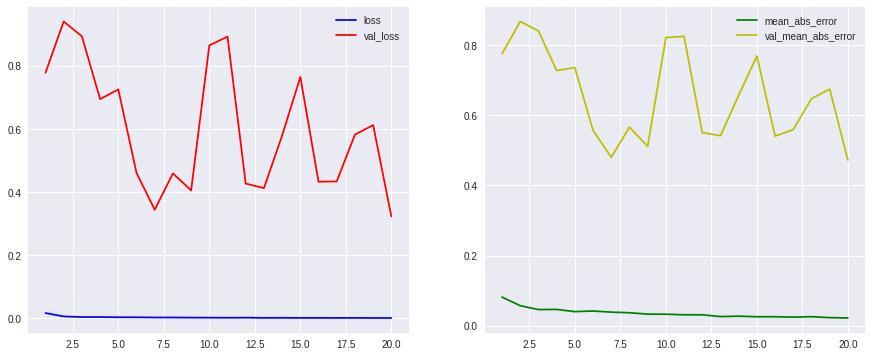

In [327]:
train_result = model_7_hist.history
epoch = np.arange(1, 20 + 1)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epoch, train_result['loss'], label='loss', c='b')
plt.plot(epoch, train_result['val_loss'], label='val_loss', c='r')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_result['mean_absolute_error'], label='mean_abs_error', c='g')
plt.plot(epoch, train_result['val_mean_absolute_error'], label='val_mean_abs_error', c='y')
plt.legend()

In [0]:
y_pred = model.predict_generator(test_gen)

In [329]:
y_pred.shape

(94, 1)

In [0]:
y_predict_true = y_test_target[6:]

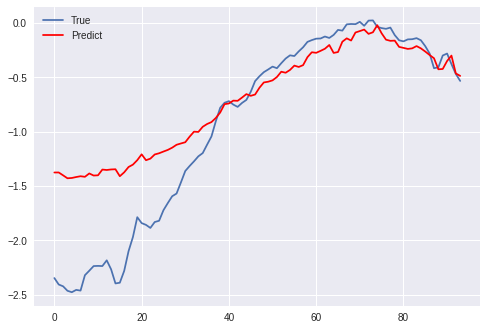

In [331]:
plt.plot(y_predict_true, label = 'True')
plt.plot(y_pred, c='r', label='Predict')
plt.legend()

# 제가 많이 쓰는 구조

# LSTM - CONV1 - [G-MP, G-AP]

## 이 구조는 Sequential로는 불가능하여 함수형 api (keras Functional API)로만 구축 가능

In [0]:
# 단별량에 대한 예측
# y = data[1]

y_train_data = train_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_train_target = train_data[:, 1]

y_valid_data = valid_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_valid_target = valid_data[:, 1]

y_test_data = test_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_test_target = test_data[:, 1]

In [333]:
print(y_train_data.shape)
print(y_train_target.shape)

print(y_valid_data.shape)
print(y_valid_target.shape)

print(y_test_data.shape)
print(y_test_target.shape)

(700, 13)
(700,)
(200, 13)
(200,)
(100, 13)
(100,)


In [0]:
train_gen = TimeseriesGenerator(y_train_data, y_train_target, length=6, batch_size=1)

valid_gen = TimeseriesGenerator(y_valid_data, y_valid_target, length=6, batch_size=1)

test_gen = TimeseriesGenerator(y_test_data, y_test_target, length=6, batch_size=1)

In [335]:
y_train_data[:6, :]

array([[ 0.26768875, -0.08722823,  0.09900754,  0.82751403, -0.29939742,
        -0.1107857 , -0.6636669 , -0.11942343, -0.11534179,  0.09565574,
        -0.39539462, -0.48534109, -0.12379648],
       [ 0.27805649, -0.15046764,  0.03793642,  0.83942126, -0.36963234,
        -0.18005563, -0.68718451, -0.18047835, -0.18386167,  0.15806104,
        -0.62237621, -0.61367981, -0.29673968],
       [ 0.2697623 , -0.16668287,  0.03311501,  0.89895738, -0.38367933,
        -0.18775229, -0.71070212, -0.19268934, -0.19147499,  0.17145534,
        -1.01044152, -1.06029854,  0.08224079],
       [ 0.2656152 , -0.13263088,  0.07168625,  0.93467906, -0.34856187,
        -0.14157234, -0.73421972, -0.1438454 , -0.14579507,  0.13949166,
        -0.90061171, -1.12703468,  0.36407416],
       [ 0.2656152 , -0.12776631,  0.07650765,  0.92277183, -0.34153837,
        -0.13387568, -0.73421972, -0.1438454 , -0.13818175,  0.13370775,
        -0.91525569, -1.06029854,  0.53808491],
       [ 0.26354165, -0.090471

In [336]:
## 6개의 데이터를 통해 7번째를 예측하는 제네레이터

counter = 0
for i in train_gen:
  print('학습')
  print(i[0])
  print('--\n')
  print('정답')
  print(i[1])
  counter +=1
  if counter == 1:
    break

학습
[[[ 0.26768875 -0.08722823  0.09900754  0.82751403 -0.29939742
   -0.1107857  -0.6636669  -0.11942343 -0.11534179  0.09565574
   -0.39539462 -0.48534109 -0.12379648]
  [ 0.27805649 -0.15046764  0.03793642  0.83942126 -0.36963234
   -0.18005563 -0.68718451 -0.18047835 -0.18386167  0.15806104
   -0.62237621 -0.61367981 -0.29673968]
  [ 0.2697623  -0.16668287  0.03311501  0.89895738 -0.38367933
   -0.18775229 -0.71070212 -0.19268934 -0.19147499  0.17145534
   -1.01044152 -1.06029854  0.08224079]
  [ 0.2656152  -0.13263088  0.07168625  0.93467906 -0.34856187
   -0.14157234 -0.73421972 -0.1438454  -0.14579507  0.13949166
   -0.90061171 -1.12703468  0.36407416]
  [ 0.2656152  -0.12776631  0.07650765  0.92277183 -0.34153837
   -0.13387568 -0.73421972 -0.1438454  -0.13818175  0.13370775
   -0.91525569 -1.06029854  0.53808491]
  [ 0.26354165 -0.09047128  0.11829316  0.95849351 -0.29939742
   -0.08769573 -0.73421972 -0.09500146 -0.09250183  0.09900432
   -0.99579754 -1.06029854  0.30749397]]]

In [0]:
# 제네레이터와 데이터와 같은지 확인
# 아무표시도 없으면 같음

assert i[0].all() == y_train_data[:6, :].all()

In [0]:
input_tensor = layers.Input(shape=(6,13))
x = layers.LSTM(64, return_sequences=True)(input_tensor)
x = layers.Conv1D(64, 3, padding='valid', activation='relu')(x)
x_1 = layers.GlobalAveragePooling1D()(x)
x_2 = layers.GlobalMaxPool1D()(x)
x_concat = layers.Concatenate()([x_1, x_2])
x_o = layers.Dense(32, activation='relu')(x_concat)
x_o = layers.Dense(16, activation='relu')(x_o)
x_out = layers.Dense(1)(x_o)


model = models.Model(input_tensor, x_out)
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [343]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 6, 13)        0                                            
__________________________________________________________________________________________________
lstm_21 (LSTM)                  (None, 6, 64)        19968       input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 4, 64)        12352       lstm_21[0][0]                    
__________________________________________________________________________________________________
global_average_pooling1d_2 (Glo (None, 64)           0           conv1d_10[0][0]                  
____________________________________________________________________________________________

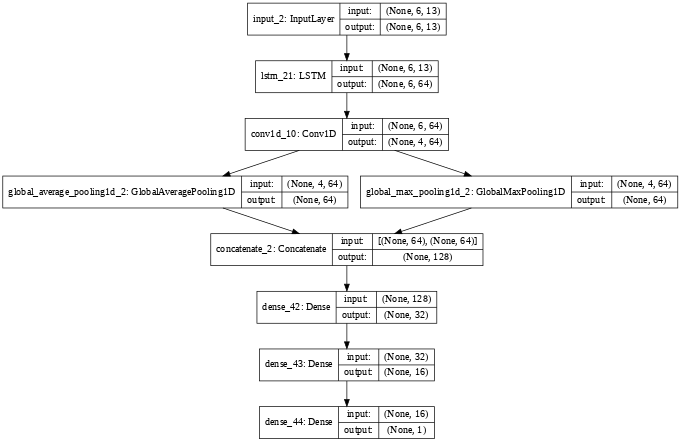

In [344]:
plot_model(model, show_shapes=True, dpi=50)

In [345]:
train_gen.end_index // train_gen.batch_size

699

In [346]:
valid_gen.end_index // valid_gen.batch_size

199

In [347]:
model_8_hist = model.fit_generator(train_gen, 
                    steps_per_epoch=train_gen.end_index // train_gen.batch_size, 
                    epochs=20, 
                    validation_data=valid_gen, 
                    validation_steps=valid_gen.end_index // valid_gen.batch_size )

Epoch 1/20
699/699 [==============================] - 19s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0888 - val_loss: 0.8522 - val_mean_absolute_error: 0.8207
Epoch 2/20
699/699 [==============================] - 15s 21ms/step - loss: 0.0075 - mean_absolute_error: 0.0610 - val_loss: 1.0420 - val_mean_absolute_error: 0.9162
Epoch 3/20
699/699 [==============================] - 15s 21ms/step - loss: 0.0062 - mean_absolute_error: 0.0596 - val_loss: 0.8139 - val_mean_absolute_error: 0.8158
Epoch 4/20
699/699 [==============================] - 15s 21ms/step - loss: 0.0041 - mean_absolute_error: 0.0469 - val_loss: 0.6376 - val_mean_absolute_error: 0.7147
Epoch 5/20
699/699 [==============================] - 15s 21ms/step - loss: 0.0038 - mean_absolute_error: 0.0452 - val_loss: 0.4593 - val_mean_absolute_error: 0.5673
Epoch 6/20
699/699 [==============================] - 15s 21ms/step - loss: 0.0038 - mean_absolute_error: 0.0443 - val_loss: 0.7708 - val_mean_absolute_error: 0.7726
Epoc

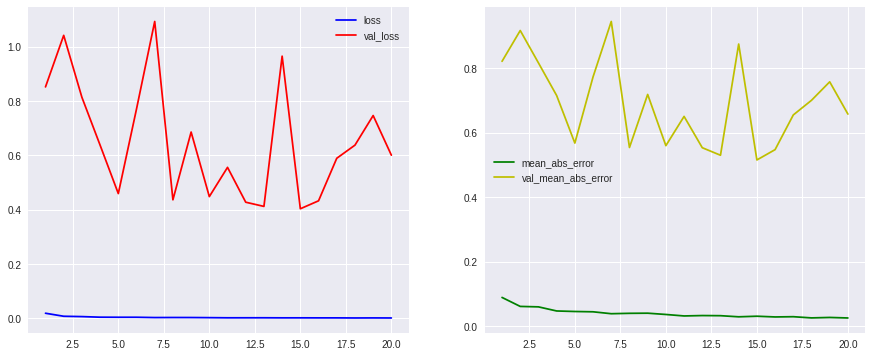

In [348]:
train_result = model_8_hist.history
epoch = np.arange(1, 20 + 1)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epoch, train_result['loss'], label='loss', c='b')
plt.plot(epoch, train_result['val_loss'], label='val_loss', c='r')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_result['mean_absolute_error'], label='mean_abs_error', c='g')
plt.plot(epoch, train_result['val_mean_absolute_error'], label='val_mean_abs_error', c='y')
plt.legend()

In [0]:
y_pred = model.predict_generator(test_gen)

In [350]:
y_pred.shape

(94, 1)

In [0]:
y_predict_true = y_test_target[6:]

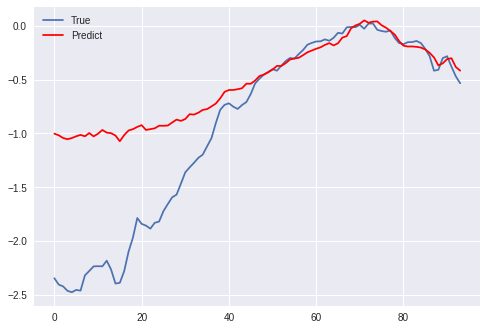

In [352]:
plt.plot(y_predict_true, label = 'True')
plt.plot(y_pred, c='r', label='Predict')
plt.legend()

# 추가 방법 : 1시간 학습으로 30분 예측



# 다변량 (X1, X2, ... Xn) 에 대한 Y 예측값


### 대략적인 방법만 봐주시면 감사하겠습니다.

In [353]:
train_data[0]

array([ 0.26768875, -0.07100373, -0.08722823,  0.09900754,  0.82751403,
       -0.29939742, -0.1107857 , -0.6636669 , -0.11942343, -0.11534179,
        0.09565574, -0.39539462, -0.48534109, -0.12379648])

In [354]:
train_data[0].shape

(14,)

In [355]:
train_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]].shape

(700, 13)

In [0]:
# 단별량에 대한 예측
# y = data[1]

y_train_data = train_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_train_target = train_data[:, 1]

y_valid_data = valid_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_valid_target = valid_data[:, 1]

y_test_data = test_data[:, [0, 2,3,4,5,6,7,8,9,10,11,12,13]]
y_test_target = test_data[:, 1]

In [357]:
print(y_train_data.shape)
print(y_train_target.shape)

print(y_valid_data.shape)
print(y_valid_target.shape)

print(y_test_data.shape)
print(y_test_target.shape)

(700, 13)
(700,)
(200, 13)
(200,)
(100, 13)
(100,)


In [0]:
train_gen_data= TimeseriesGenerator(y_train_data, y_train_target, length=6, batch_size=1)
train_gen_target = TimeseriesGenerator(y_train_target[6:], y_train_target[6:], length=3, batch_size=1)

valid_gen_data = TimeseriesGenerator(y_valid_data, y_valid_target, length=6, batch_size=1)
valid_gen_target = TimeseriesGenerator(y_valid_target[6:], y_valid_target[6:], length=3, batch_size=1)

test_gen_data = TimeseriesGenerator(y_test_data, y_test_target, length=6, batch_size=1)
test_gen_target = TimeseriesGenerator(y_test_target[6:], y_test_target[6:], length=3, batch_size=1)

In [365]:
# 이 데이터를 학습해서
y_train_data[:6, :]

array([[ 0.26768875, -0.08722823,  0.09900754,  0.82751403, -0.29939742,
        -0.1107857 , -0.6636669 , -0.11942343, -0.11534179,  0.09565574,
        -0.39539462, -0.48534109, -0.12379648],
       [ 0.27805649, -0.15046764,  0.03793642,  0.83942126, -0.36963234,
        -0.18005563, -0.68718451, -0.18047835, -0.18386167,  0.15806104,
        -0.62237621, -0.61367981, -0.29673968],
       [ 0.2697623 , -0.16668287,  0.03311501,  0.89895738, -0.38367933,
        -0.18775229, -0.71070212, -0.19268934, -0.19147499,  0.17145534,
        -1.01044152, -1.06029854,  0.08224079],
       [ 0.2656152 , -0.13263088,  0.07168625,  0.93467906, -0.34856187,
        -0.14157234, -0.73421972, -0.1438454 , -0.14579507,  0.13949166,
        -0.90061171, -1.12703468,  0.36407416],
       [ 0.2656152 , -0.12776631,  0.07650765,  0.92277183, -0.34153837,
        -0.13387568, -0.73421972, -0.1438454 , -0.13818175,  0.13370775,
        -0.91525569, -1.06029854,  0.53808491],
       [ 0.26354165, -0.090471

In [388]:
# 이 값이 나와야함
y_train_target[6:9]

array([-0.00514062, -0.00514062, -0.05289137])

In [380]:
## 6개의 데이터를 통해 7번째를 예측하는 제네레이터

counter = 0
for i in train_gen_data:
  print('학습')
  print(i[0])
  print('--\n')
  print('정답')
  print(i[1])
  counter +=1
  if counter == 1:
    break

학습
[[[ 0.26768875 -0.08722823  0.09900754  0.82751403 -0.29939742
   -0.1107857  -0.6636669  -0.11942343 -0.11534179  0.09565574
   -0.39539462 -0.48534109 -0.12379648]
  [ 0.27805649 -0.15046764  0.03793642  0.83942126 -0.36963234
   -0.18005563 -0.68718451 -0.18047835 -0.18386167  0.15806104
   -0.62237621 -0.61367981 -0.29673968]
  [ 0.2697623  -0.16668287  0.03311501  0.89895738 -0.38367933
   -0.18775229 -0.71070212 -0.19268934 -0.19147499  0.17145534
   -1.01044152 -1.06029854  0.08224079]
  [ 0.2656152  -0.13263088  0.07168625  0.93467906 -0.34856187
   -0.14157234 -0.73421972 -0.1438454  -0.14579507  0.13949166
   -0.90061171 -1.12703468  0.36407416]
  [ 0.2656152  -0.12776631  0.07650765  0.92277183 -0.34153837
   -0.13387568 -0.73421972 -0.1438454  -0.13818175  0.13370775
   -0.91525569 -1.06029854  0.53808491]
  [ 0.26354165 -0.09047128  0.11829316  0.95849351 -0.29939742
   -0.08769573 -0.73421972 -0.09500146 -0.09250183  0.09900432
   -0.99579754 -1.06029854  0.30749397]]]

In [379]:
counter = 0
for i in train_gen_target:
  print('학습')
  print(i[0])
  print('--\n')
  print('정답')
  print(i[1])
  counter +=1
  if counter == 1:
    break

학습
[[-0.00514062 -0.00514062 -0.05289137]]
--

정답
[-0.13851342]


## 이 작업을 하기 위해, 제네레이터로 나오는 모든 값들을 변수로 저장

In [0]:
# x_train : 학습데이터 오브젝트화
train_full_data = []
for i in train_gen_data:
  train_full_data.append(i[0])

In [0]:
# y_train : 학습데이터 오브젝트화
train_target_data = []
for i in train_gen_target:
  train_target_data.append(i[0])

In [0]:
# x_valid : 검증 데이터 오브젝트화
valid_data = []
for i in valid_gen_data:
  valid_data.append(i[0])

In [0]:
# y_valid : 검증 데이터 오브젝트화
valid_target_data = []
for i in valid_gen_target:
  valid_target_data.append(i[0])

In [404]:
# 오브젝트 타입은 리스트로 넣어놨음.
type(train_full_data)

list

In [0]:
# list 를 행렬로 변환
train_full = np.asarray(train_full_data)

In [406]:
# 변환 shape
train_full.shape

(694, 1, 6, 13)

In [0]:
# tensor shape를 694, 6, 13 으로 변경 (-1 = Python이 알아서 맞는 값으로 바꾸라는 숫자)
train_full = train_full.reshape(-1, 6,13)

In [0]:
# 변환시 학습 데이터의 뒷부분은 정답이 없기때문에 제거
train_full = train_full[:-3, :, :]

In [0]:
train_t = np.asarray(train_target_data)
train_t = train_t.reshape(-1, 3)

In [419]:
train_t.shape

(691, 3)

In [0]:
# 검증데이터도 똑같이 처리
valid_full = np.asarray(valid_data)
valid_full = valid_full.reshape(-1, 6, 13)

In [0]:
valid_full = valid_full[:-3, :, :]

In [425]:
valid_full.shape

(191, 6, 13)

In [0]:
valid_t = np.asarray(valid_target_data)
valid_t = valid_t.reshape(-1 , 3)

In [423]:
valid_t.shape

(191, 3)

In [0]:
model = models.Sequential()
model.add(layers.LSTM(64, input_shape=(6,13)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(3))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

### 데이터를 Object로 가지고 있기때문에 fit_generator 사용 필요 없음

In [427]:
model_9_hist = model.fit(train_full, train_t, epochs=20, validation_data=(valid_full, valid_t), batch_size=1)

Train on 691 samples, validate on 191 samples
Epoch 1/20
691/691 [==============================] - 17s 24ms/step - loss: 0.0228 - mean_absolute_error: 0.0848 - val_loss: 1.3095 - val_mean_absolute_error: 1.0273
Epoch 2/20
691/691 [==============================] - 13s 19ms/step - loss: 0.0046 - mean_absolute_error: 0.0507 - val_loss: 1.2267 - val_mean_absolute_error: 0.9969
Epoch 3/20
691/691 [==============================] - 13s 19ms/step - loss: 0.0036 - mean_absolute_error: 0.0444 - val_loss: 0.9906 - val_mean_absolute_error: 0.8881
Epoch 4/20
691/691 [==============================] - 13s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0421 - val_loss: 0.8823 - val_mean_absolute_error: 0.8010
Epoch 5/20
691/691 [==============================] - 13s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0407 - val_loss: 0.8883 - val_mean_absolute_error: 0.8281
Epoch 6/20
691/691 [==============================] - 13s 18ms/step - loss: 0.0024 - mean_absolute_error: 0.0359 - val_loss:

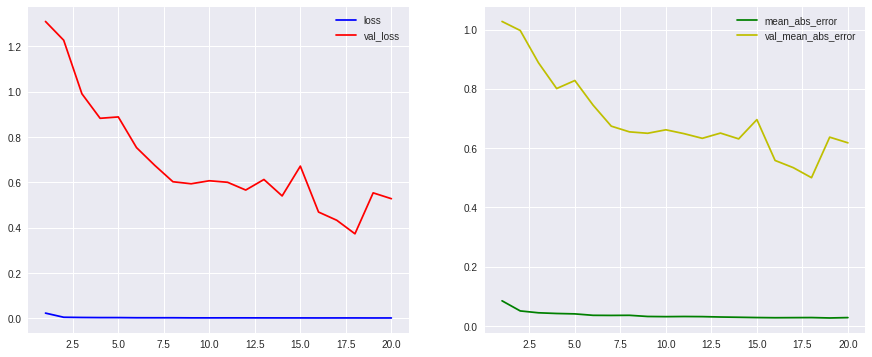

In [429]:
train_result = model_9_hist.history
epoch = np.arange(1, 20 + 1)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epoch, train_result['loss'], label='loss', c='b')
plt.plot(epoch, train_result['val_loss'], label='val_loss', c='r')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_result['mean_absolute_error'], label='mean_abs_error', c='g')
plt.plot(epoch, train_result['val_mean_absolute_error'], label='val_mean_abs_error', c='y')
plt.legend()

# 검증데이터로 확인해봄

In [0]:
y_pred = model.predict(valid_full)

In [452]:
y_pred.shape

(191, 3)

In [454]:
y_pred[:, 2]

array([-0.3894447 , -0.3713826 , -0.35100758, -0.35812962, -0.37102997,
       -0.37534472, -0.4024449 , -0.4359375 , -0.45058042, -0.48401272,
       -0.48085964, -0.4210833 , -0.46491793, -0.49577403, -0.47569612,
       -0.5231159 , -0.48794746, -0.4935027 , -0.51306957, -0.52941054,
       -0.582953  , -0.53069305, -0.55391115, -0.55891824, -0.55390704,
       -0.5529393 , -0.5974285 , -0.5989518 , -0.59680337, -0.53898245,
       -0.6064735 , -0.58632827, -0.5845927 , -0.58042455, -0.60137224,
       -0.62580186, -0.61961323, -0.59702325, -0.6133481 , -0.60687923,
       -0.6297652 , -0.62919027, -0.6780546 , -0.71635085, -0.67933977,
       -0.61484945, -0.64016694, -0.6503617 , -0.6510531 , -0.6430689 ,
       -0.6870847 , -0.66309   , -0.7122349 , -0.7372784 , -0.76320946,
       -0.73098236, -0.81824845, -0.8170835 , -0.82874763, -0.80122054,
       -0.7849638 , -0.8086666 , -0.79385495, -0.69389755, -0.7324093 ,
       -0.77482504, -0.8025417 , -0.7471849 , -0.68384993, -0.69

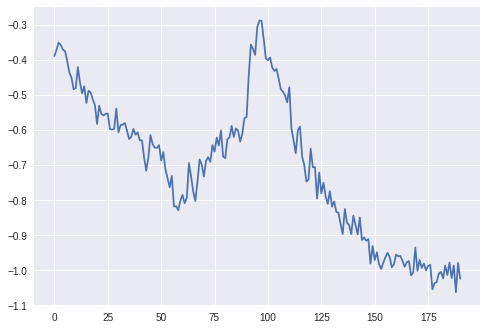

In [455]:
plt.plot(y_pred[:, 2])

In [0]:
y_pred = y_pred.reshape(-1,)

In [0]:
for_valid = valid_t.reshape(-1,)

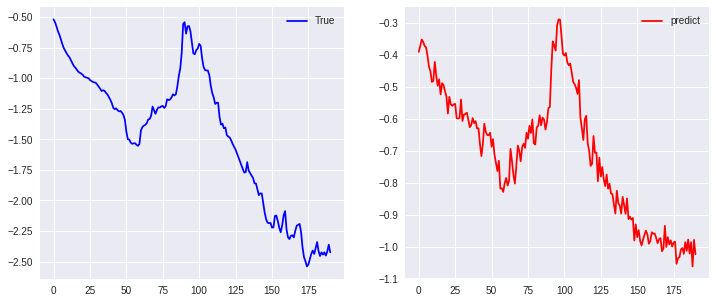

In [464]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(valid_t[:, 2], label = 'True', c= 'b')
plt.legend()

plt.subplot(1,2,2)
plt.plot(y_pred[:, 2], label = 'predict', c='r')
plt.legend()

## lOSS 관련

In [446]:
scaler.mean_

array([ 9.95229030e+02, -7.58878000e+00,  2.65937940e+02, -9.51605000e+00,
        8.63503200e+01,  3.75628000e+00,  3.25394000e+00,  5.02200000e-01,
        2.03780000e+00,  3.27150000e+00,  1.30460773e+03,  1.57001000e+00,
        2.69543000e+00,  1.63896310e+02])

In [447]:
scaler.var_

array([2.32579838e+01, 3.68837833e+01, 3.80323858e+01, 3.87164375e+01,
       7.05308119e+01, 2.02718696e+00, 1.68808988e+00, 1.80806360e-01,
       6.70654160e-01, 1.72524935e+00, 1.07910792e+03, 1.86527170e+00,
       3.79458802e+00, 8.77451338e+03])

# loss 에서 0.3 차이가 났다면, 온도는 3.47도 차이가 남

In [0]:
def inverse_scaling(x):
  return x * scaler.var_[1] + scaler.mean_[1]

In [449]:
inverse_scaling(0.3)

3.47635499348